# alpha-diversity shipping 16S

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

# from qiime2 import (Artifact,
#                     Metadata as qmd)

# from qiime2.plugins import (cutadapt,
#                             demux,
#                             feature_table as qft,
#                             taxa as q2t,)

# from qiime2 import Metadata
# from qiime2 import Visualization

# from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
# import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
# import qiime2.plugins.metadata.actions as metadata_actions
# import qiime2.plugins.taxa.actions as taxa_actions
# import qiime2.plugins.phylogeny.actions as phylogeny_actions
# from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


In [4]:
shipping_general_metadata_all_samples = pd.read_csv('shipping_general_metadata_all_samples.tsv', sep='\t', index_col=0)
shipping_general_metadata_all_samples.head()

identifier row  column  temperature  day  replicate  \
SampleID                                                                       
366294_209-LP4-16S-0709   W00.00.00   E       5           20    0          0   
366294_255-LP4-16S-0755   W04.01.01   C      11            4    1          1   
366294_237-LP4-16S-0737   W04.01.02   A       9            4    2          1   
366294_198-LP4-16S-0698  W04.01.03    B       4            4    3          1   
366294_240-LP4-16S-0740   W04.01.04   D       9            4    4          1   

                        well  DNA yield  DNA_total_yield_per_1g    pH  ...  \
SampleID                                                               ...   
366294_209-LP4-16S-0709  E05   7.819449             5212.964986  3.71  ...   
366294_255-LP4-16S-0755  C11   7.974214             5316.141023  3.66  ...   
366294_237-LP4-16S-0737  A09   3.321537             2214.357237  3.67  ...   
366294_198-LP4-16S-0698  B04   6.282538             4188.357582  3.68  ...   
366294_240-LP4-16S-0740  D09   5.447592             3631.727200  3.65  ...   

                         yeast CFUs  mannitol   glucose  fructose  \
SampleID                                                            
366294_209-LP4-16S-0709     6.95664  0.864599  0.412389  0.040404   
366294_255-LP4-16S-0755     7.51433  1.678354  0.276854  0.039286   
366294_237-LP4-16S-0737     7.45165  0.662367  0.097518  0.007847   
366294_198-LP4-16S-0698     7.31960  1.717166  0.214524  0.015318   
366294_240-LP4-16S-0740     7.33935  1.206856  0.155969 -0.003239   

                              sucrose      maltose  succinic acid  \
SampleID                                                            
366294_209-LP4-16S-0709  -0.029735456  4.793423904       5.862573   
366294_255-LP4-16S-0755    0.02639304  0.925282319      13.457405   
366294_237-LP4-16S-0737  -0.047546617  0.216395132       6.252762   
366294_198-LP4-16S-0698  -0.059561247  0.397240918      14.922299   
366294_240-LP4-16S-0740  -0.005661029  0.144521676       8.844037   

                         lactic acid  acetic acid     ethanol  
SampleID                                                       
366294_209-LP4-16S-0709    61.383637    18.551724  196.452715  
366294_255-LP4-16S-0755   368.966753    84.278621  832.741635  
366294_237-LP4-16S-0737    55.275562    19.417931  242.621754  
366294_198-LP4-16S-0698   440.114706   100.584828  971.970944  
366294_240-LP4-16S-0740   192.640918    35.553103  423.481734  

[5 rows x 26 columns]

merge in the ASV based alpha-div metrics, OTUs and kmer based (only merged tables)

In [ ]:
# features_ASV = pd.read_csv('16S/ASVs/alpha_rarefaction/core-metrics-results-380/20250510_merged_relative_features_ASV_species_names_unique.csv', sep=',', index_col=0)
# features_ASV.head()

Lactobacillus sanfranciscensis  Pediococcus sp.  \
366294_118-LP4-16S-0618                        0.809630         0.012318   
366294_121-LP4-16S-0621                        0.000000         0.000000   
366294_124-LP4-16S-0624                        0.425587         0.000000   
366294_128-LP4-16S-0628                        0.102719         0.037261   
366294_130-LP4-16S-0630                        0.510000         0.009000   

                         Acetobacter pasteurianus  \
366294_118-LP4-16S-0618                       0.0   
366294_121-LP4-16S-0621                       0.0   
366294_124-LP4-16S-0624                       0.0   
366294_128-LP4-16S-0628                       0.0   
366294_130-LP4-16S-0630                       0.0   

                         Acetobacter pasteurianus ssg. 2  \
366294_118-LP4-16S-0618                              0.0   
366294_121-LP4-16S-0621                              0.0   
366294_124-LP4-16S-0624                              0.0   
366294_128-LP4-16S-0628                              0.0   
366294_130-LP4-16S-0630                              0.0   

                         Bacillus halotolerans  \
366294_118-LP4-16S-0618                    0.0   
366294_121-LP4-16S-0621                    0.0   
366294_124-LP4-16S-0624                    0.0   
366294_128-LP4-16S-0628                    0.0   
366294_130-LP4-16S-0630                    0.0   

                         Lactobacillus sanfranciscensis ssg. 2  \
366294_118-LP4-16S-0618                                    0.0   
366294_121-LP4-16S-0621                                    0.0   
366294_124-LP4-16S-0624                                    0.0   
366294_128-LP4-16S-0628                                    0.0   
366294_130-LP4-16S-0630                                    0.0   

                         Lactobacillus brevis  \
366294_118-LP4-16S-0618              0.032475   
366294_121-LP4-16S-0621              0.000000   
366294_124-LP4-16S-0624              0.044386   
366294_128-LP4-16S-0628              0.101712   
366294_130-LP4-16S-0630              0.041000   

                         Acetobacter pasteurianus ssg. 3  \
366294_118-LP4-16S-0618                         0.027996   
366294_121-LP4-16S-0621                         1.000000   
366294_124-LP4-16S-0624                         0.436031   
366294_128-LP4-16S-0628                         0.643505   
366294_130-LP4-16S-0630                         0.367000   

                         Lactobacillus sanfranciscensis ssg. 3  \
366294_118-LP4-16S-0618                                    0.0   
366294_121-LP4-16S-0621                                    0.0   
366294_124-LP4-16S-0624                                    0.0   
366294_128-LP4-16S-0628                                    0.0   
366294_130-LP4-16S-0630                                    0.0   

                         Pantoea agglomerans  Lactobacillus rossiae  \
366294_118-LP4-16S-0618                  0.0               0.117581   
366294_121-LP4-16S-0621                  0.0               0.000000   
366294_124-LP4-16S-0624                  0.0               0.093995   
366294_128-LP4-16S-0628                  0.0               0.114804   
366294_130-LP4-16S-0630                  0.0               0.073000   

                         Lactobacillus sanfranciscensis ssg. 4  
366294_118-LP4-16S-0618                                    0.0  
366294_121-LP4-16S-0621                                    0.0  
366294_124-LP4-16S-0624                                    0.0  
366294_128-LP4-16S-0628                                    0.0  
366294_130-LP4-16S-0630                                    0.0

In [10]:
features_ASV = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction/core-metrics-results-380/merged_relative_frequency_table.qza')).view(pd.DataFrame)

features_OTU = q2.Artifact.load(os.path.join(wd, '16S/OTUs/alpha_rarefaction/core-metrics-results-380/merged_relative_frequency_table.qza')).view(pd.DataFrame)

features_kmer = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-merged/kmer_table.qza')).view(pd.DataFrame)

TypeError: No format: BIOMV210DirFmt

In [ ]:
#make a vector of observed features per sample based on features_ASV, and merge it to shipping_general_metadata_all_samples:
shipping_general_metadata_all_samples['Observed features ASVs'] = (features_ASV > 0).sum(axis=1)

shipping_general_metadata_all_samples['Observed features ASVs'].head()

#make a vector of observed features per sample based on features_ASV, and merge it to shipping_general_metadata_all_samples:
shipping_general_metadata_all_samples['Observed features OTUs'] = (features_OTU > 0).sum(axis=1)

shipping_general_metadata_all_samples['Observed features OTUs'].head()

#make a vector of observed features per sample based on features_ASV, and merge it to shipping_general_metadata_all_samples:
shipping_general_metadata_all_samples['Observed features kmers'] = (features_kmer > 0).sum(axis=1)

shipping_general_metadata_all_samples['Observed features kmers'].head()

SampleID
366294_209-LP4-16S-0709    678.0
366294_255-LP4-16S-0755    708.0
366294_237-LP4-16S-0737    653.0
366294_198-LP4-16S-0698    598.0
366294_240-LP4-16S-0740    678.0
Name: Observed features kmers, dtype: float64

In [ ]:
md = shipping_general_metadata_all_samples.copy()

then merge also all alpha div. metrics into the same table:

In [ ]:
import os
import pandas as pd
import qiime2 as q2

#ASVs:
# Load the Faith PD vector as a pandas Series
chao = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction/core-metrics-results-380/merged_table_chao1.qza')).view(pd.Series)
chao = chao.rename('Chao1 ASVs')
# Load the Faith PD vector as a pandas Series
shan = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction/core-metrics-results-380/merged_table_shannon.qza')).view(pd.Series)
shan = shan.rename('Shannon ASVs')
even = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction/core-metrics-results-380/merged_table_evenness.qza')).view(pd.Series)
even = even.rename('Evenness ASVs')
simp = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction/core-metrics-results-380/merged_table_simpson.qza')).view(pd.Series)
simp = simp.rename('Simpson ASVs')

# Load the metadata as a pandas DataFrame


# Convert the Faith PD Series to a DataFrame
chao_df = chao.to_frame(name='Chao1 ASVs')

# Merge the two DataFrames using a left join on their index (sample IDs)
merged_df = chao_df.join(md, how='left')
merged_df_2 = merged_df.join(shan, how ='left')
merged_df_3 = merged_df_2.join(even, how ='left')
merged_df_4 = merged_df_3.join(simp, how ='left')
# Now you can inspect or use the merged DataFrame
print(merged_df_4.head())

                         Chao1 ASVs identifier row  column  temperature  day  \
366294_118-LP4-16S-0618         6.0  W04.02.28   B       6            4   28   
366294_121-LP4-16S-0621         1.0  W30.02.28   E       6           30   28   
366294_124-LP4-16S-0624         4.0  W17.01.28   H       6           17   28   
366294_128-LP4-16S-0628         5.0  W30.03.28   D       7           30   28   
366294_130-LP4-16S-0630         5.0  W17.02.28   F       7           17   28   

                         replicate well  DNA yield  DNA_total_yield_per_1g  \
366294_118-LP4-16S-0618          2  B06   5.473262             3648.841056   
366294_121-LP4-16S-0621          2  E06   0.141937               94.624864   
366294_124-LP4-16S-0624          1  H06   4.522389             3014.926288   
366294_128-LP4-16S-0628          3  D07   0.854114              569.409623   
366294_130-LP4-16S-0630          2  F07   5.455442             3636.961016   

                         ...  succinic acid  lacti

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catc

In [ ]:
md = merged_df_4.copy()

In [ ]:
#OTUs:
# Load the Faith PD vector as a pandas Series
chao = q2.Artifact.load(os.path.join(wd, '16S/OTUs/alpha_rarefaction/core-metrics-results-380/merged_table_chao1.qza')).view(pd.Series)
chao = chao.rename('Chao1 OTUs')
# Load the Faith PD vector as a pandas Series
shan = q2.Artifact.load(os.path.join(wd, '16S/OTUs/alpha_rarefaction/core-metrics-results-380/merged_table_shannon.qza')).view(pd.Series)
shan = shan.rename('Shannon OTUs')
even = q2.Artifact.load(os.path.join(wd, '16S/OTUs/alpha_rarefaction/core-metrics-results-380/merged_table_evenness.qza')).view(pd.Series)
even = even.rename('Evenness OTUs')
simp = q2.Artifact.load(os.path.join(wd, '16S/OTUs/alpha_rarefaction/core-metrics-results-380/merged_table_simpson.qza')).view(pd.Series)
simp = simp.rename('Simpson OTUs')

# Load the metadata as a pandas DataFrame


# Convert the Faith PD Series to a DataFrame
chao_df = chao.to_frame(name='Chao1 OTUs')

# Merge the two DataFrames using a left join on their index (sample IDs)
merged_df = chao_df.join(md, how='left')
merged_df_2 = merged_df.join(shan, how ='left')
merged_df_3 = merged_df_2.join(even, how ='left')
merged_df_4 = merged_df_3.join(simp, how ='left')
# Now you can inspect or use the merged DataFrame
print(merged_df_4.head())

                         Chao1 OTUs  Chao1 ASVs identifier row  column  \
366294_118-LP4-16S-0618         5.0         6.0  W04.02.28   B       6   
366294_121-LP4-16S-0621         1.0         1.0  W30.02.28   E       6   
366294_124-LP4-16S-0624         4.0         4.0  W17.01.28   H       6   
366294_128-LP4-16S-0628         5.0         5.0  W30.03.28   D       7   
366294_130-LP4-16S-0630         5.0         5.0  W17.02.28   F       7   

                         temperature  day  replicate well  DNA yield  ...  \
366294_118-LP4-16S-0618            4   28          2  B06   5.473262  ...   
366294_121-LP4-16S-0621           30   28          2  E06   0.141937  ...   
366294_124-LP4-16S-0624           17   28          1  H06   4.522389  ...   
366294_128-LP4-16S-0628           30   28          3  D07   0.854114  ...   
366294_130-LP4-16S-0630           17   28          2  F07   5.455442  ...   

                         ethanol  Observed features ASVs  \
366294_118-LP4-16S-0618      NaN

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catc

In [ ]:
md = merged_df_4.copy()

In [ ]:
#kmers:
# Load the Faith PD vector as a pandas Series
chao = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-merged/merged_table_chao1.qza')).view(pd.Series)
chao = chao.rename('Chao1 kmers')
# Load the Faith PD vector as a pandas Series
shan = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-merged/merged_table_shannon.qza')).view(pd.Series)
shan = shan.rename('Shannon kmers')
even = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-merged/merged_table_evenness.qza')).view(pd.Series)
even = even.rename('Evenness kmers')
simp = q2.Artifact.load(os.path.join(wd, '16S/ASVs/alpha_rarefaction_k/core-metrics-results-380-merged/merged_table_simpson.qza')).view(pd.Series)
simp = simp.rename('Simpson kmers')

# Load the metadata as a pandas DataFrame


# Convert the Faith PD Series to a DataFrame
chao_df = chao.to_frame(name='Chao1 kmers')

# Merge the two DataFrames using a left join on their index (sample IDs)
merged_df = chao_df.join(md, how='left')
merged_df_2 = merged_df.join(shan, how ='left')
merged_df_3 = merged_df_2.join(even, how ='left')
merged_df_4 = merged_df_3.join(simp, how ='left')
# Now you can inspect or use the merged DataFrame
print(merged_df_4.head())

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catc

                         Chao1 kmers  Chao1 OTUs  Chao1 ASVs identifier row  \
366294_118-LP4-16S-0618        718.0         5.0         6.0  W04.02.28   B   
366294_121-LP4-16S-0621        244.0         1.0         1.0  W30.02.28   E   
366294_124-LP4-16S-0624        653.0         4.0         4.0  W17.01.28   H   
366294_128-LP4-16S-0628        708.0         5.0         5.0  W30.03.28   D   
366294_130-LP4-16S-0630        708.0         5.0         5.0  W17.02.28   F   

                         column  temperature  day  replicate well  ...  \
366294_118-LP4-16S-0618       6            4   28          2  B06  ...   
366294_121-LP4-16S-0621       6           30   28          2  E06  ...   
366294_124-LP4-16S-0624       6           17   28          1  H06  ...   
366294_128-LP4-16S-0628       7           30   28          3  D07  ...   
366294_130-LP4-16S-0630       7           17   28          2  F07  ...   

                         Observed features kmers  Shannon ASVs  Evenness ASVs  \

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')


In [ ]:
merged_df_4.columns.to_list()

['Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers']

In [ ]:
#save the metadata as a csv file:
merged_df_4.to_csv('20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity.csv', sep=',')

check on Nans and negative values (and #VALUE values from HPLC, remove them and make 0 or keep NaN where true Nans)

In [5]:
#read the metadata as a pandas DataFrame
md = pd.read_csv('20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_no_nans.csv', sep=',', index_col=0)

#make NaNs to 0 in the full dataframe:
#make all nans 0:
# md = md.apply(pd.to_numeric, errors='coerce')
# md = md.fillna(0).clip(lower=0)



# cols_to_clip = [
#     'mannitol', 'glucose', 'fructose', 'sucrose', 'maltose',
#     'lactic acid', 'acetic acid', 'ethanol', 'succinic acid'
# ]

# for col in cols_to_clip:
#     md[col] = pd.to_numeric(md[col], errors='coerce')
#     print(f"{col}: {md[col].isna().sum()} NaNs before filling")
#     md[col] = md[col].fillna(0).clip(lower=0)



In [ ]:
# #print how many samples have NaN values in the columns:
# for col in cols_to_clip:
#     print(f"{col}: {md[col].isna().sum()} samples with NaN values")

mannitol: 0 samples with NaN values
glucose: 0 samples with NaN values
fructose: 0 samples with NaN values
sucrose: 34 samples with NaN values
maltose: 35 samples with NaN values
lactic acid: 0 samples with NaN values
acetic acid: 0 samples with NaN values
ethanol: 0 samples with NaN values
succinic acid: 0 samples with NaN values


In [6]:
from matplotlib.colors import to_rgb, to_hex
import numpy as np

# Define base colors (lightest) for each temperature
# base_colors = {
#     '4°C (Sky Blue)': '#56b4e9',
#     '17°C (Bluish Green)': '#009e73',
#     '30°C (Orange)': '#e69f00'
# }
base_colors = {
    '4°C (Sky Blue)': '#9EC8FFFF',
    '17°C (Bluish Green)': '#FDC067FF',
    '30°C (Orange)': '#751C6DFF'
}



# Define the time points
time_points = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21', '28']
n_points = len(time_points)

# Create darker-to-lighter gradients
gradient_palette_adjusted = {}

for label, hex_color in base_colors.items():
    base_rgb = np.array(to_rgb(hex_color))
    gradient = {}
    for i, tp in enumerate(time_points):
        factor = 0.2 + 0.8 * (i / (n_points - 1))  # Linear scale from dark (0.4) to original (1.0)
        adjusted_rgb = tuple(base_rgb * factor)
        gradient[tp] = to_hex(adjusted_rgb)
    gradient_palette_adjusted[label] = gradient

gradient_palette_adjusted


{'4°C (Sky Blue)': {'1': '#202833',
  '2': '#2c3847',
  '3': '#39485c',
  '4': '#465870',
  '5': '#526885',
  '6': '#5f7899',
  '7': '#6b88ad',
  '10': '#7898c2',
  '14': '#85a8d6',
  '21': '#91b8eb',
  '28': '#9ec8ff'},
 '17°C (Bluish Green)': {'1': '#332615',
  '2': '#47361d',
  '3': '#5b4525',
  '4': '#6f542d',
  '5': '#846436',
  '6': '#98733e',
  '7': '#ac8346',
  '10': '#c0924e',
  '14': '#d5a157',
  '21': '#e9b15f',
  '28': '#fdc067'},
 '30°C (Orange)': {'1': '#170616',
  '2': '#21081f',
  '3': '#2a0a27',
  '4': '#330c30',
  '5': '#3d0f39',
  '6': '#461141',
  '7': '#50134a',
  '10': '#591553',
  '14': '#62185c',
  '21': '#6c1a64',
  '28': '#751c6d'}}

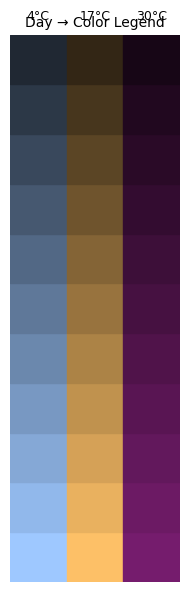

In [7]:
# Rebuild the gradient palette dictionary manually since the file is missing

# gradient_palette = {
#     '4°C (Sky Blue)': {
#         '1': '#22485d', '2': '#28536b', '3': '#2d5e79', '4': '#326887', '5': '#377395',
#         '6': '#3c7ea3', '7': '#4189b1', '10': '#4794bf', '14': '#4c9ecd', '21': '#51a9db', '28': '#56b4e9'
#     },
#     '17°C (Bluish Green)': {
#         '1': '#003f2e', '2': '#004935', '3': '#00523c', '4': '#005c43', '5': '#00654a',
#         '6': '#006f50', '7': '#007857', '10': '#00825e', '14': '#008b65', '21': '#00956c', '28': '#009e73'
#     },
#     '30°C (Orange)': {
#         '1': '#5c4000', '2': '#6a4900', '3': '#785300', '4': '#855c00', '5': '#936600',
#         '6': '#a16f00', '7': '#af7900', '10': '#bd8200', '14': '#ca8c00', '21': '#d89500', '28': '#e69f00'
#     }
# }
gradient_palette = gradient_palette_adjusted.copy()


# Use previously defined metadata generation and plotting
# Define temperature groups and days
temps = ['4°C (Sky Blue)', '17°C (Bluish Green)', '30°C (Orange)']
days_ordered = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21', '28']



metadata = md.copy()

# Map numerical temperature strings to gradient_palette keys
temp_key_map = {
    '4': '4°C (Sky Blue)',
    '17': '17°C (Bluish Green)',
    '30': '30°C (Orange)'
}


# Assign color
def map_color(row):
    day = str(row['day'])
    temp_raw = str(row['temperature'])
    
    if row.get('control', False) or temp_raw == '20' or day == '0':
        return '#000000'  # Black for control

    temp = temp_key_map.get(temp_raw)
    if temp and day in gradient_palette[temp]:
        return gradient_palette[temp][day]
    
    return '#BBBBBB'  # Fallback


metadata['color'] = metadata.apply(map_color, axis=1)

# Create a legend for the color gradients
fig_leg, ax_leg = plt.subplots(figsize=(2, 6))

# Plot vertical gradients for each temperature
for col, temp in enumerate(temps):
    for row, day in enumerate(reversed(days_ordered)):
        color = gradient_palette[temp][day]
        ax_leg.add_patch(plt.Rectangle((col, row), 1, 1, color=color))
    ax_leg.text(col + 0.5, len(days_ordered) + 0.3, temp.split()[0], ha='center', fontsize=9)

ax_leg.set_xlim(0, 3)
ax_leg.set_ylim(0, len(days_ordered))
ax_leg.set_xticks([])
ax_leg.set_yticks([])
ax_leg.set_title("Day → Color Legend", fontsize=10)
ax_leg.axis('off')

plt.tight_layout()
plt.show()


In [8]:
#make a new color column where all colors are the same per temperature (the brightes of the previous colors, except for 20 degrees it is black):
# Define the new color mapping
def map_color_fixed(row):
    temp_raw = str(row['temperature'])
    
    if row.get('control', False) or temp_raw == '20' or row['day'] == '0':
        return '#000000'  # Black for control

    temp = temp_key_map.get(temp_raw)
    if temp:
        return gradient_palette[temp]['28']  # Use the color for day 28
    
    return '#BBBBBB'  # Fallback

In [9]:
metadata['color2'] = metadata.apply(map_color_fixed, axis=1)

In [10]:
metadata

Chao1 kmers  Chao1 OTUs  Chao1 ASVs  identifier row  \
366294_121-LP4-16S-0621   244.000000         1.0         1.0   W30.02.28   E   
366294_147-LP4-16S-0647   244.000000         1.0         1.0   W30.01.28   G   
366294_142-LP4-16S-0642   244.000000         2.0         1.0   W17.03.28   B   
366294_175-LP4-16S-0675   361.000000         5.0         2.0   W17.03.01   C   
366294_200-LP4-16S-0700   366.344828         1.0         2.0  W17.01.01    D   
...                              ...         ...         ...         ...  ..   
366294_179-LP4-16S-0679   718.000000         6.0         9.0   W17.03.06   G   
366294_211-LP4-16S-0711   728.000000         5.0         7.0  W30.01.01    G   
366294_132-LP4-16S-0632   728.000000         5.0         7.0   W04.01.28   H   
366294_224-LP4-16S-0724   728.000000         5.0         7.0   W17.03.14   D   
366294_186-LP4-16S-0686   734.000000         5.0        11.0   W17.02.05   F   

                         column  temperature  day  replicate well  ...  \
366294_121-LP4-16S-0621       6           30   28          2  E06  ...   
366294_147-LP4-16S-0647       9           30   28          1  G09  ...   
366294_142-LP4-16S-0642       9           17   28          3  B09  ...   
366294_175-LP4-16S-0675       1           17    1          3  C01  ...   
366294_200-LP4-16S-0700       4           17    1          1  D04  ...   
...                         ...          ...  ...        ...  ...  ...   
366294_179-LP4-16S-0679       1           17    6          3  G01  ...   
366294_211-LP4-16S-0711       5           30    1          1  G05  ...   
366294_132-LP4-16S-0632       7            4   28          1  H07  ...   
366294_224-LP4-16S-0724       7           17   14          3  D07  ...   
366294_186-LP4-16S-0686       2           17    5          2  F02  ...   

                         Evenness ASVs  Simpson ASVs  Shannon OTUs  \
366294_121-LP4-16S-0621       0.000000      0.000000      0.000000   
366294_147-LP4-16S-0647       0.000000      0.000000      0.000000   
366294_142-LP4-16S-0642       0.000000      0.000000      0.995727   
366294_175-LP4-16S-0675       0.066634      0.015706      0.136859   
366294_200-LP4-16S-0700       0.027267      0.005464      0.000000   
...                                ...           ...           ...   
366294_179-LP4-16S-0679       0.346985      0.340780      0.939898   
366294_211-LP4-16S-0711       0.323106      0.269474      0.611716   
366294_132-LP4-16S-0632       0.470056      0.444598      1.023748   
366294_224-LP4-16S-0724       0.519479      0.565799      1.441522   
366294_186-LP4-16S-0686       0.349573      0.420970      0.936512   

                         Evenness OTUs  Simpson OTUs  Shannon kmers  \
366294_121-LP4-16S-0621       0.000000      0.000000       7.918076   
366294_147-LP4-16S-0647       0.000000      0.000000       7.918076   
366294_142-LP4-16S-0642       0.995727      0.497041       7.918076   
366294_175-LP4-16S-0675       0.068430      0.031205       7.952775   
366294_200-LP4-16S-0700       0.000000      0.000000       7.926608   
...                                ...           ...            ...   
366294_179-LP4-16S-0679       0.404792      0.356676       8.768013   
366294_211-LP4-16S-0711       0.263452      0.177119       8.411517   
366294_132-LP4-16S-0632       0.440904      0.353560       8.665579   
366294_224-LP4-16S-0724       0.620830      0.574820       9.019031   
366294_186-LP4-16S-0686       0.403334      0.393186       8.850571   

                         Evenness kmers  Simpson kmers    color   color2  
366294_121-LP4-16S-0621        0.998404       0.995840  #751c6d  #751c6d  
366294_147-LP4-16S-0647        0.998404       0.995840  #751c6d  #751c6d  
366294_142-LP4-16S-0642        0.998404       0.995840  #fdc067  #fdc067  
366294_175-LP4-16S-0675        0.936077       0.995825  #332615  #fdc067  
366294_200-LP4-16S-0700        0.932997       0.995792  #332615  #fdc067  
...                            

In [11]:
md = metadata.copy()

Kruskal per time point:

In [ ]:
# from scipy.stats import kruskal
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# def plot_alpha_diversity(data, value_col, title, ylabel, return_stats=False):
#     # Calculate means and stds
#     means = data.groupby(['day', 'temperature'])[value_col].mean().reset_index()
#     stds = data.groupby(['day', 'temperature'])[value_col].std().reset_index()
#     means = means.rename(columns={value_col: 'mean_value'})
#     stds = stds.rename(columns={value_col: 'std_value'})
    
#     summary_df = pd.merge(means, stds, on=['day', 'temperature'])
#     summary_df['error'] = summary_df['std_value']
    
#     temperature_labels = {4: "4°C", 17: "17°C", 30: "30°C", 20: "Control"}
#     summary_df['temperature_label'] = summary_df['temperature'].map(temperature_labels)

#     # Plot
#     plt.figure(figsize=(8, 4))
#     ax = sns.lineplot(
#         data=summary_df,
#         x='day', y='mean_value', hue='temperature_label',
#         palette=custom_palette, marker="o", ci=None
#     )

#     # Error bars
#     for _, row in summary_df.iterrows():
#         plt.errorbar(
#             row['day'], row['mean_value'], 
#             yerr=row['error'], fmt='none', 
#             color=custom_palette[row['temperature_label']],
#             alpha=0.7, capsize=5, elinewidth=1
#         )

#     # Kruskal–Wallis tests
#     stats_list = []
#     data = data.copy()
#     data = data[data['temperature'].isin([4, 17, 30])]  # Remove control
#     grouped = data.groupby('day')

#     y_range = data[value_col].max() - data[value_col].min()

#     for day, group in grouped:
#         row = {'day': day, 'n_temperatures': group['temperature'].nunique()}
#         if group['temperature'].nunique() >= 2:
#             groups = [
#                 group[group['temperature'] == t][value_col].dropna()
#                 for t in [4, 17, 30] if t in group['temperature'].values
#             ]
#             stat, p = kruskal(*groups)
#             row['kruskal_stat'] = stat
#             row['p_value'] = p
#             if p < 0.05:
#                 max_y = group[value_col].max()
#                 if p < 0.001:
#                     stars = '***'
#                 elif p < 0.01:
#                     stars = '**'
#                 else:
#                     stars = '*'
#                 ax.text(day, max_y + 0.001 * y_range, stars, ha='center', va='bottom', fontsize=14)
#         else:
#             row['kruskal_stat'] = None
#             row['p_value'] = None
#         stats_list.append(row)

#     stats_df = pd.DataFrame(stats_list)

#     # Final touches
#     plt.title(title, fontsize=14)
#     plt.xlabel('Days', fontsize=12)
#     plt.ylabel(ylabel, fontsize=12)
#     desired_days = [1, 2, 3, 4, 5, 6, 7, 10, 14, 21, 28]
#     plt.xticks(ticks=desired_days, labels=desired_days, fontsize=12)
#     plt.yticks(fontsize=12)

#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     plt.grid(False)

#     legend = plt.legend(title='Temperature', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=12)
#     legend.set_title('')
#     fig = plt.gcf()  # <-- Add this at the end of the function before `plt.show()`
#     plt.tight_layout()
#     plt.show()

#     if return_stats:
#         return fig, stats_df




In [ ]:
! pip install xlsxwriter

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/3963773602.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

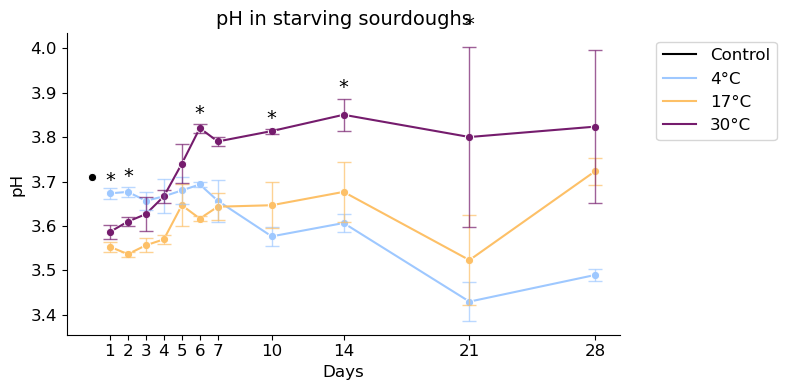

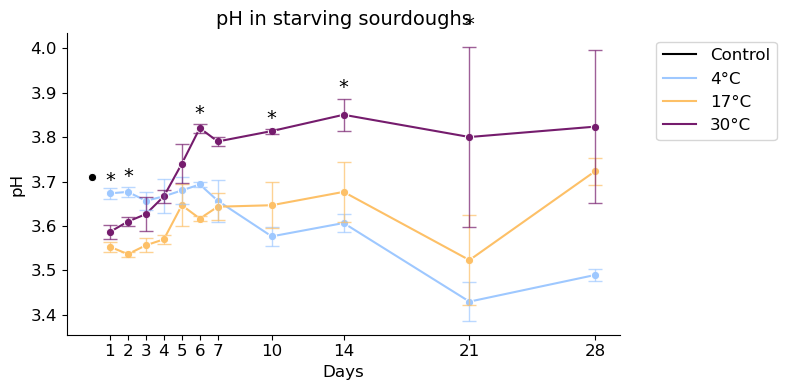

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/3963773602.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

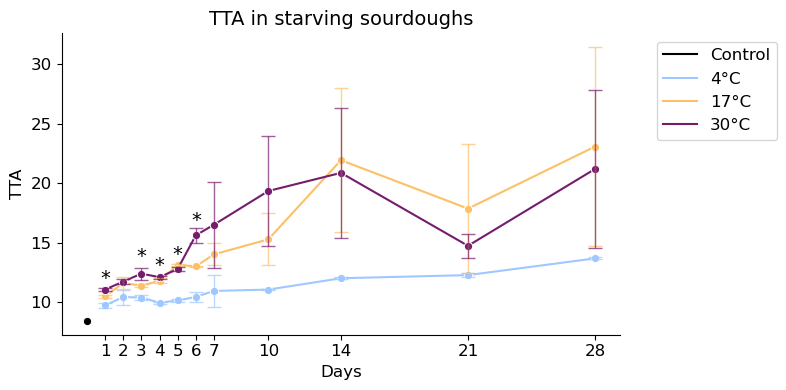

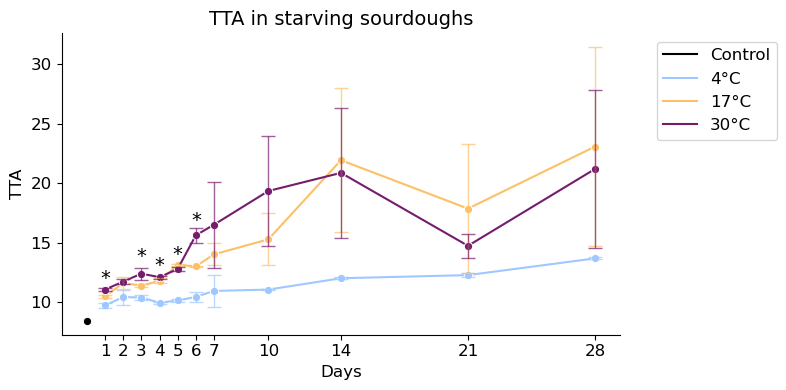

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/3963773602.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

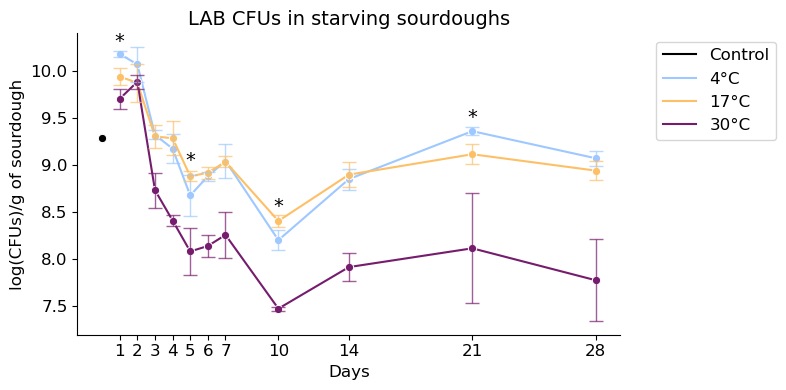

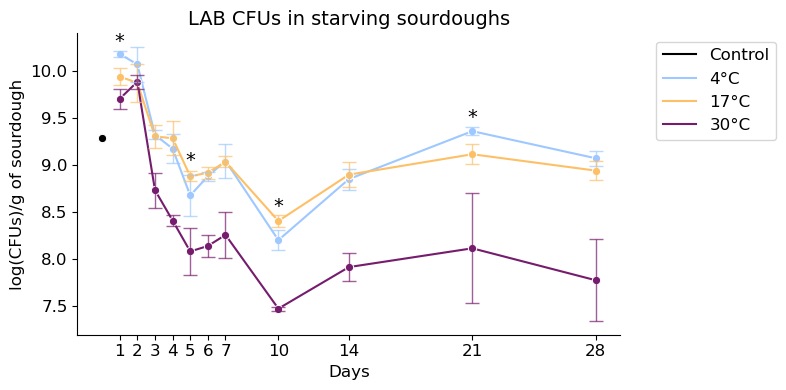

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/3963773602.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

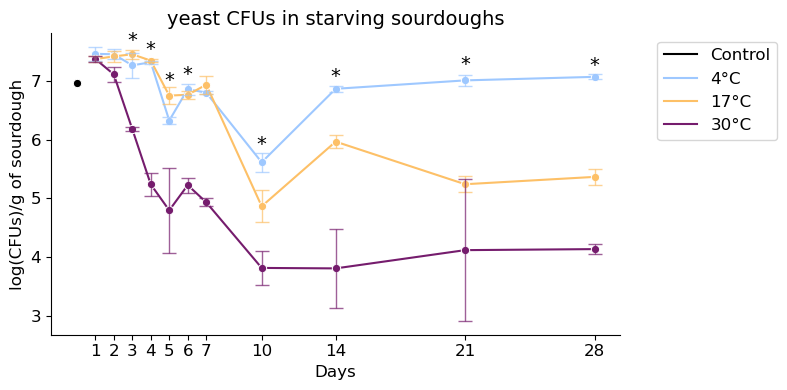

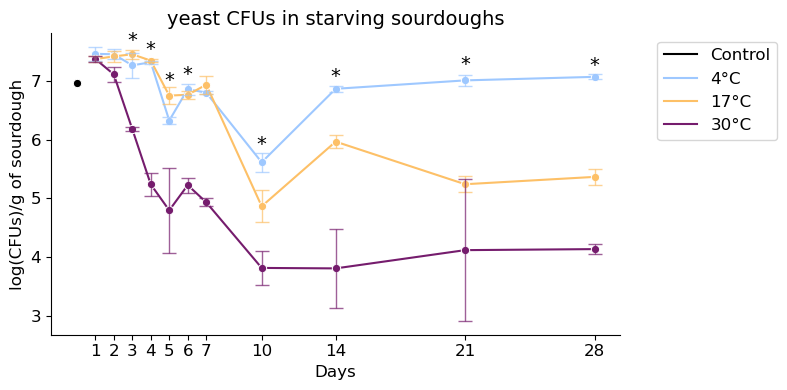

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/3963773602.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

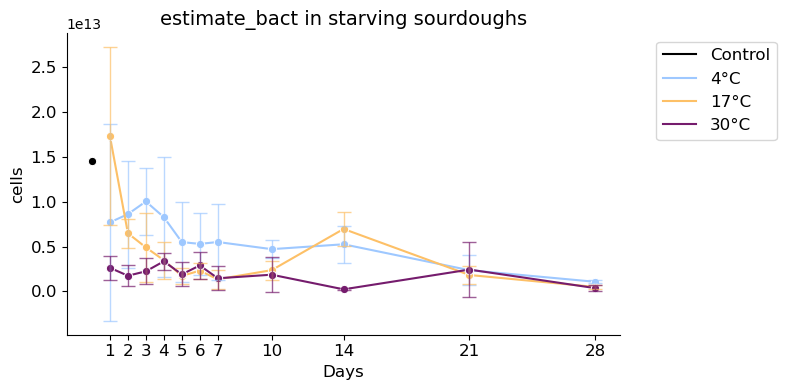

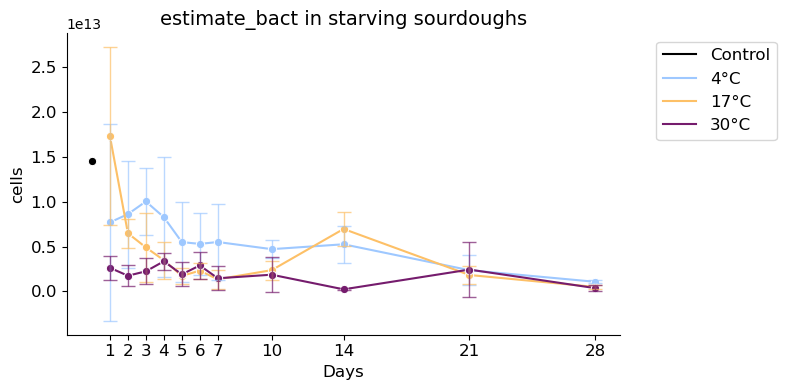

All results saved to: Stats/20250512_kruskal_results_all_metrics_ASVs_merged.xlsx


In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# from IPython.display import display
# from scipy.stats import kruskal
# import xlsxwriter

# # Output paths
# fig_dir = "Figures/per_variable_stats_kruskal/"
# os.makedirs(fig_dir, exist_ok=True)
# excel_path = "Stats/20250512_kruskal_results_all_metrics_ASVs_merged.xlsx"

# # Variables to loop over
# metrics = {
#     'pH': 'pH',
#     'TTA': 'TTA',
#     'LAB CFUs': 'log(CFUs)/g of sourdough',
#     'yeast CFUs': 'log(CFUs)/g of sourdough',
#     'estimate_bact': 'cells'
# }

# # Container for all results (for Excel export)
# excel_writer = pd.ExcelWriter(excel_path, engine='xlsxwriter')

# for var, ylab in metrics.items():
#     title = f"{var} in starving sourdoughs"
#     filename = os.path.join(fig_dir, f"20250512_Kruskal_{var.replace(' ', '_')}.pdf")

#     # Get plot and stats
#     fig, result_df = plot_alpha_diversity(
#         data=md,
#         value_col=var,
#         title=title,
#         ylabel=ylab,
#         return_stats=True
#     )

#     # Save and show
#     fig.savefig(filename, format='pdf', bbox_inches='tight')
#     display(fig)
#     plt.close(fig)

#     # Save stats
#     result_df.to_excel(excel_writer, sheet_name=var[:31], index=False)


# # Save the Excel workbook
# excel_writer.close()
# print(f"All results saved to: {excel_path}")


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/2632786841.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

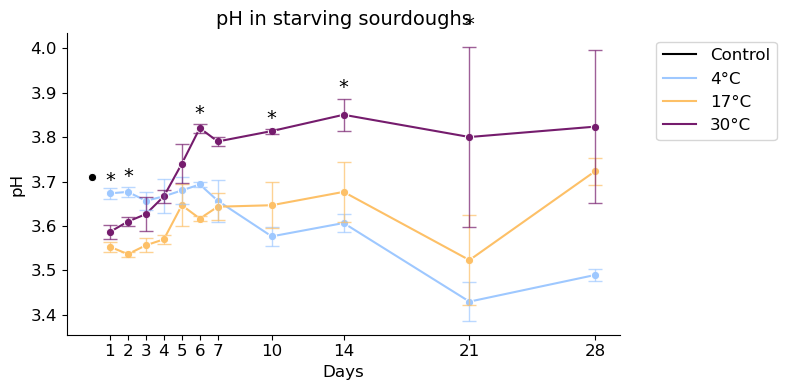

    day   p_value
0     1  0.025706
1     2  0.025706
2     3  0.050906
3     4  0.062818
4     5  0.062818
5     6  0.025706
6     7  0.066463
7    10  0.037942
8    14  0.038990
9    21  0.038990
10   28  0.119433


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/2632786841.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

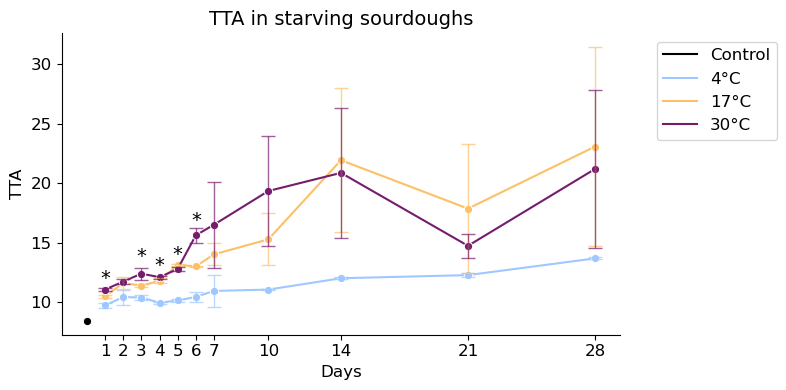

    day   p_value
0     1  0.027324
1     2  0.065698
2     3  0.027324
3     4  0.038990
4     5  0.027324
5     6  0.027324
6     7  0.050906
7    10  0.050906
8    14  0.060810
9    21  0.060810
10   28  0.133469


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/2632786841.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

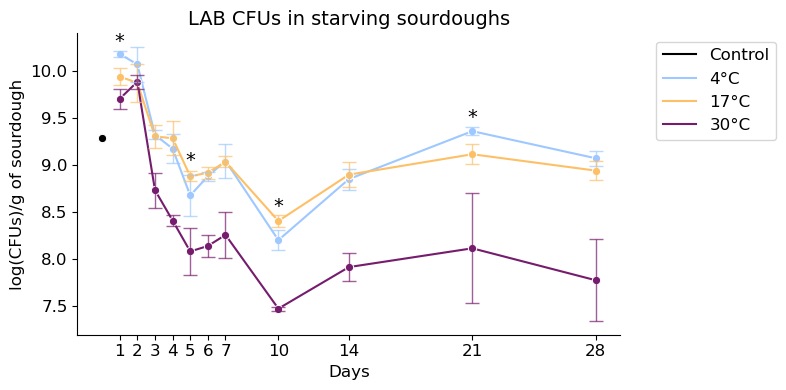

    day   p_value
0     1  0.027324
1     2  0.429796
2     3  0.060810
3     4  0.050906
4     5  0.027324
5     6  0.060810
6     7  0.066463
7    10  0.027324
8    14  0.050906
9    21  0.027324
10   28  0.062177


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/2632786841.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

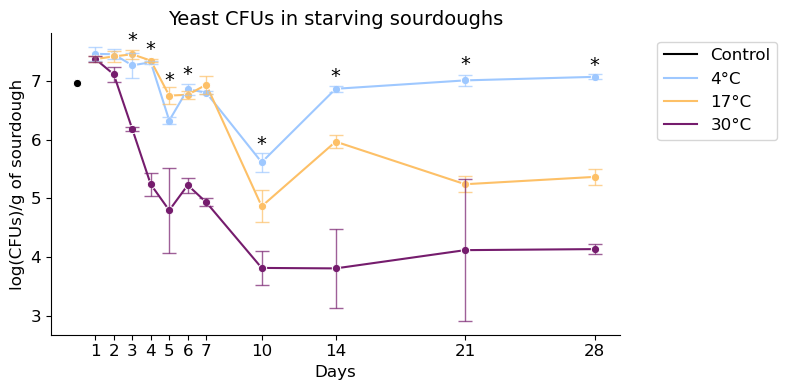

    day   p_value
0     1  0.561144
1     2  0.066463
2     3  0.038990
3     4  0.036904
4     5  0.027324
5     6  0.038990
6     7  0.060810
7    10  0.027324
8    14  0.027324
9    21  0.038990
10   28  0.043937


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_59021/2632786841.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

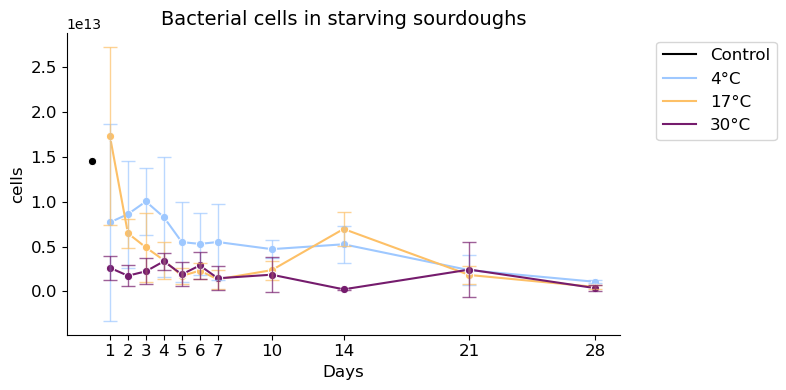

    day   p_value
0     1  0.193120
1     2  0.065698
2     3  0.147916
3     4  0.732632
4     5  0.732632
5     6  0.586646
6     7  0.429796
7    10  0.060810
8    14  0.050906
9    21  0.956529
10   28  0.133469


In [ ]:
# # To both plot and inspect significance:
# results_pH = plot_alpha_diversity(md, 'pH', 'pH in starving sourdoughs', 'pH', return_stats=True)

# # Check p-values
# print(results_pH[['day', 'p_value']])

# results_TTA = plot_alpha_diversity(md, 'TTA', 'TTA in starving sourdoughs', 'TTA', return_stats=True)

# # Check p-values
# print(results_TTA[['day', 'p_value']])

# results_LAB = plot_alpha_diversity(md, 'LAB CFUs', 'LAB CFUs in starving sourdoughs', 'log(CFUs)/g of sourdough', return_stats=True)
# # Check p-values
# print(results_LAB[['day', 'p_value']])
# results_yeast = plot_alpha_diversity(md, 'yeast CFUs', 'Yeast CFUs in starving sourdoughs', 'log(CFUs)/g of sourdough', return_stats=True)
# # Check p-values
# print(results_yeast[['day', 'p_value']])
# results_bact = plot_alpha_diversity(md, 'estimate_bact', 'Bacterial cells in starving sourdoughs', 'cells', return_stats=True)
# # Check p-values
# print(results_bact[['day', 'p_value']])
# # Save the results to a file
# # results_pH.to_csv('results_pH.csv', index=False)
# # results_TTA.to_csv('results_TTA.csv', index=False)
# # results_LAB.to_csv('results_LAB.csv', index=False)
# # results_yeast.to_csv('results_yeast.csv', index=False)
# # results_bact.to_csv('results_bact.csv', index=False)




## ANOVAs for all variables

In [ ]:
#save the metadata file with color scheme:
#save the metadata as a csv file:
metadata.to_csv('20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv', sep=',')

In [12]:
#import again:
metadata = pd.read_csv('20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv', sep=',', index_col=0)

In [13]:
#drop the sample at day 0:
metadata = metadata[metadata['day'] != 0]

In [18]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_alpha_diversity(data, value_col, title, ylabel, return_stats=False, max_day=None, bottom=None, top=None):
    data = data.copy()

    # Clean values
    data[value_col] = pd.to_numeric(data[value_col], errors='coerce')

    # Filter by max_day if specified
    if max_day is not None:
        data = data[data['day'] <= max_day]

    # Step 1: Mean & SD per temperature x day
    means = data.groupby(['day', 'temperature'])[value_col].mean().reset_index()
    stds = data.groupby(['day', 'temperature'])[value_col].std().reset_index()
    means = means.rename(columns={value_col: 'mean_value'})
    stds = stds.rename(columns={value_col: 'std_value'})
    summary_df = pd.merge(means, stds, on=['day', 'temperature'])
    summary_df['error'] = summary_df['std_value']

    # Temperature label mapping
    temperature_labels = {4: "4°C", 17: "17°C", 30: "30°C", 20: "Control"}
    summary_df['temperature_label'] = summary_df['temperature'].map(temperature_labels)
    # Rebuild custom_palette using labeled keys
    custom_palette = (
        md.drop_duplicates('temperature')
        .assign(temp_label=lambda df: df['temperature'].map(temperature_labels))
        .set_index('temp_label')['color2']
        .to_dict()
    )

    # Plotting
    plt.figure(figsize=(8, 4))
    ax = sns.lineplot(
        data=summary_df,
        x='day', y='mean_value', hue='temperature_label',
        palette=custom_palette, marker="o", ci=None
    )

    # Error bars
    for _, row in summary_df.iterrows():
        plt.errorbar(
            row['day'], row['mean_value'],
            yerr=row['error'], fmt='none',
            color=custom_palette[row['temperature_label']],
            alpha=0.7, capsize=5, elinewidth=1
        )

    # ANOVA tests
    stats_list = []
    data_filtered = data[data['temperature'].isin([4, 17, 30])]  # Exclude control
    grouped = data_filtered.groupby('day')
    y_range = data_filtered[value_col].max() - data_filtered[value_col].min()

    for day, group in grouped:
        row = {'day': day, 'n_temperatures': group['temperature'].nunique()}
        if row['n_temperatures'] >= 2:
            groups = [
                group[group['temperature'] == t][value_col].dropna()
                for t in [4, 17, 30] if t in group['temperature'].values
            ]
            if all(len(g) > 1 for g in groups):  # Avoid errors from singleton groups
                stat, p = f_oneway(*groups)
                # Rough eta-squared effect size: SSB / SST
                group_means = [g.mean() for g in groups]
                group_sizes = [len(g) for g in groups]
                overall_mean = group[value_col].mean()

                ss_between = sum(n * (mean - overall_mean)**2 for n, mean in zip(group_sizes, group_means))
                ss_total = sum((x - overall_mean)**2 for g in groups for x in g)
                eta_squared = ss_between / ss_total if ss_total > 0 else None
                row['effect_size_eta2'] = eta_squared

                row['anova_stat'] = stat
                row['p_value'] = p
                # if p < 0.05:
                #     max_y = group[value_col].max()
                #     if p < 0.001:
                #         stars = '***'
                #     elif p < 0.01:
                #         stars = '**'
                #     else:
                #         stars = '*'
                #     ax.text(day, max_y + 0.05 * y_range, stars, ha='center', va='bottom', fontsize=14)
            else:
                row['anova_stat'] = None
                row['p_value'] = None
        else:
            row['anova_stat'] = None
            row['p_value'] = None
        stats_list.append(row)

    stats_df = pd.DataFrame(stats_list)
    from statsmodels.stats.multitest import multipletests

    # Apply FDR correction across p-values within this specific variable
    valid_pvals = stats_df['p_value'].dropna()
    rejected, pvals_adj, _, _ = multipletests(valid_pvals, alpha=0.05, method='fdr_bh')

    # Store adjusted p-values and significance
    stats_df.loc[stats_df['p_value'].notna(), 'p_value_adj'] = pvals_adj
    stats_df.loc[stats_df['p_value'].notna(), 'significant'] = rejected

    # Optional: re-plot significant asterisks using adjusted p-values
    for _, row in stats_df.dropna(subset=['p_value_adj']).iterrows():
        if row['significant']:
            p = row['p_value_adj']
            if p < 0.001:
                stars = '***'
            elif p < 0.01:
                stars = '**'
            else:
                stars = '*'
            max_y = data[data['day'] == row['day']][value_col].max()
            ax.text(row['day'], max_y + 0.05 * y_range, stars, ha='center', va='bottom', fontsize=18)


    # Final plot styling
    plt.title(title, fontsize=16)
    plt.xlabel('Days', fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    # desired_days = [1, 2, 3, 4, 5, 6, 7, 10, 14, 21, 28]
    desired_days = sorted(data['day'].unique())

    plt.xticks(ticks=desired_days, labels=desired_days, fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(bottom, top)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid(False)
    legend = plt.legend(title='Temperature', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=16)
    legend.set_title('')
    fig = plt.gcf()
    plt.tight_layout()
    plt.show()

    if return_stats:
        return fig, stats_df



In [15]:
md = metadata.copy()

In [16]:
md['mannitol'].describe()

count    90.000000
mean      1.456999
std       0.267415
min       0.649645
25%       1.324934
50%       1.475936
75%       1.615656
max       2.078476
Name: mannitol, dtype: float64

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

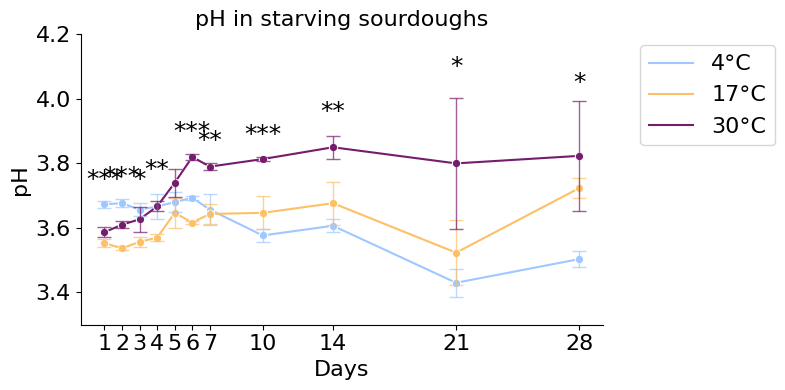

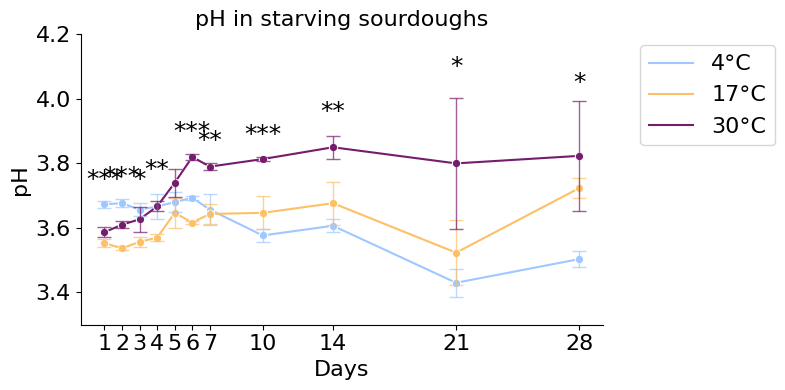

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

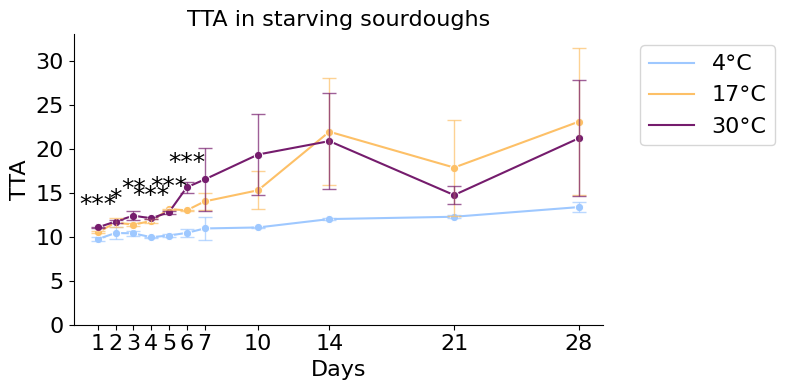

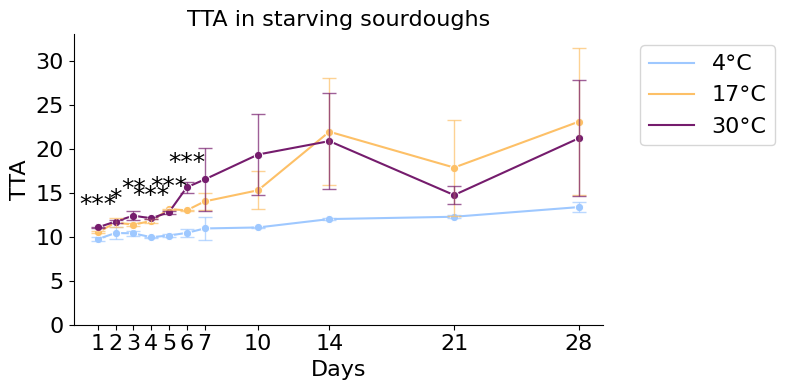

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

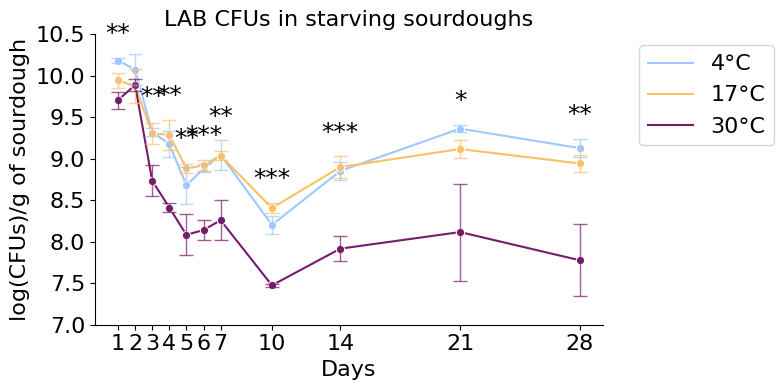

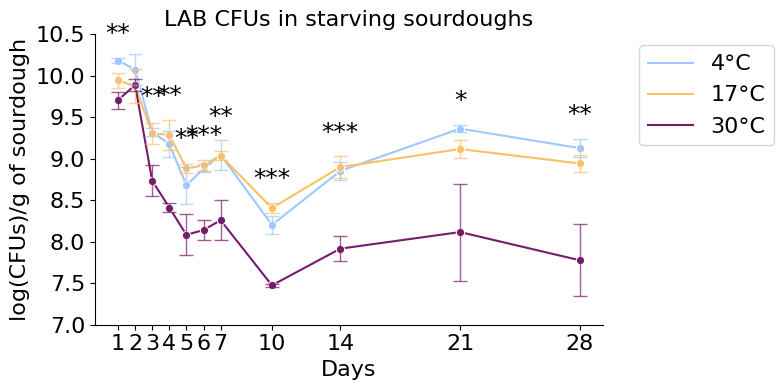

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

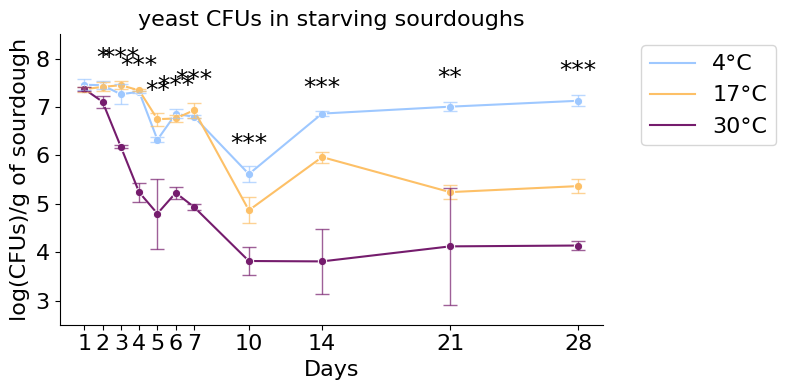

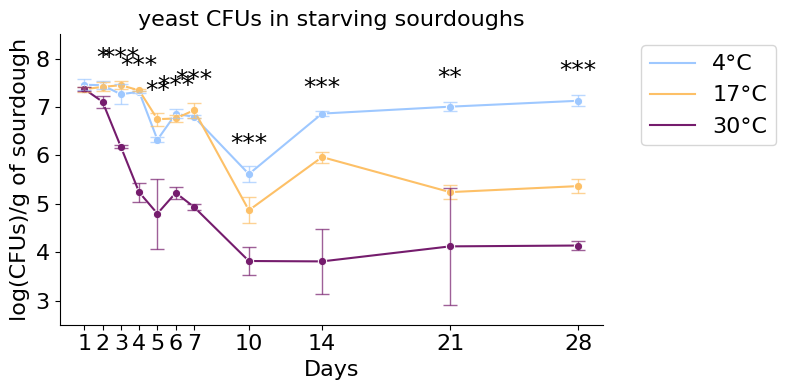

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

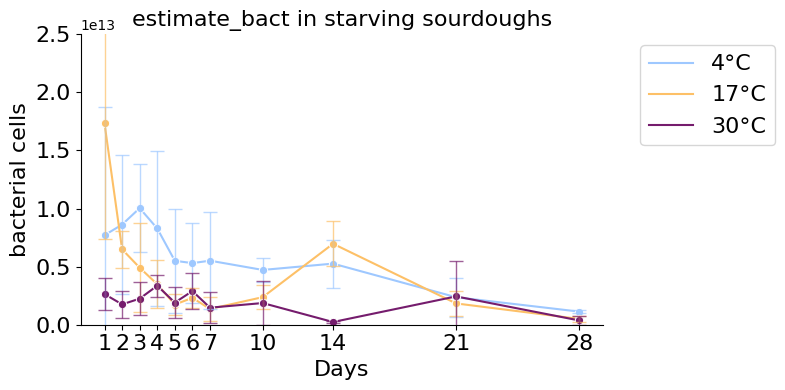

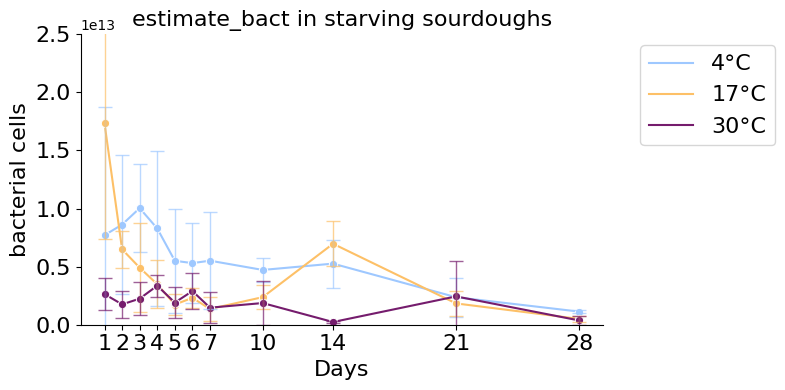

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

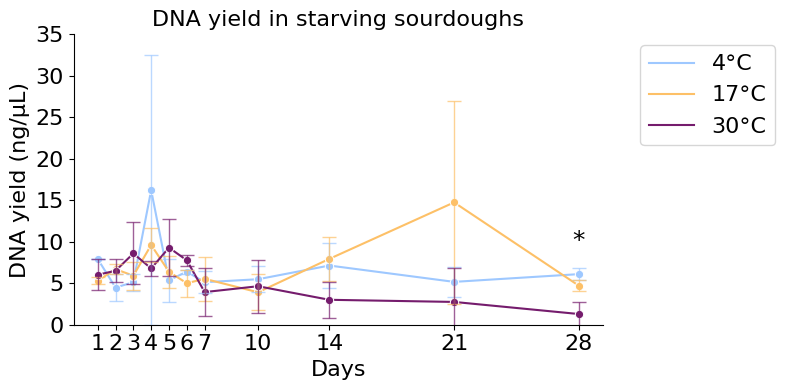

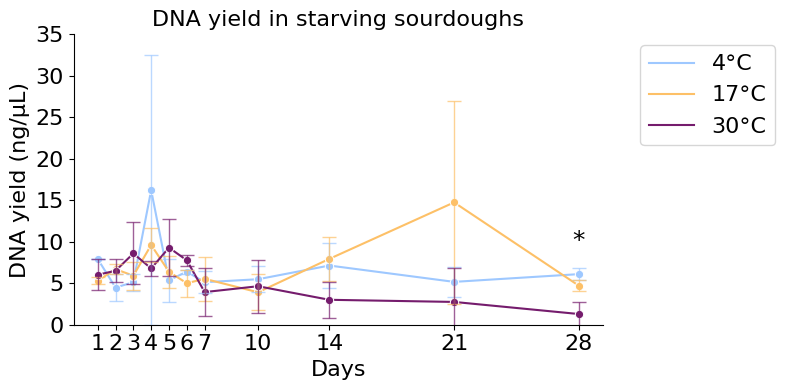

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

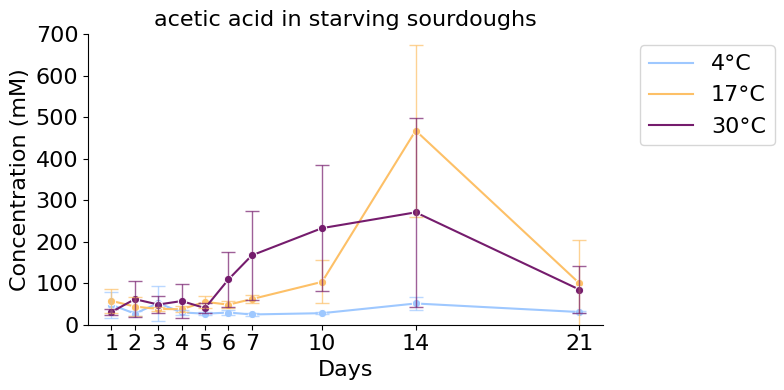

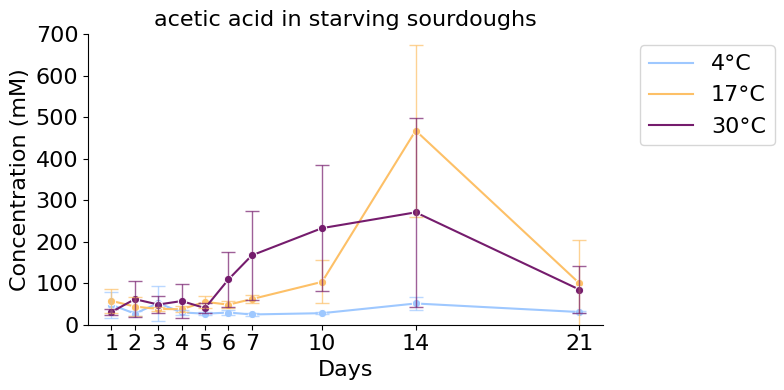

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

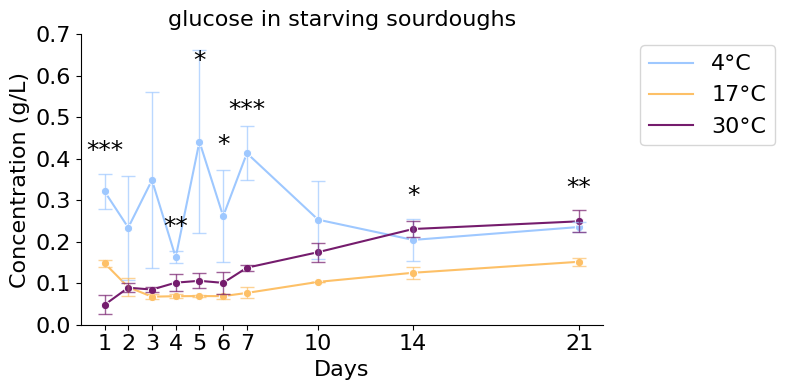

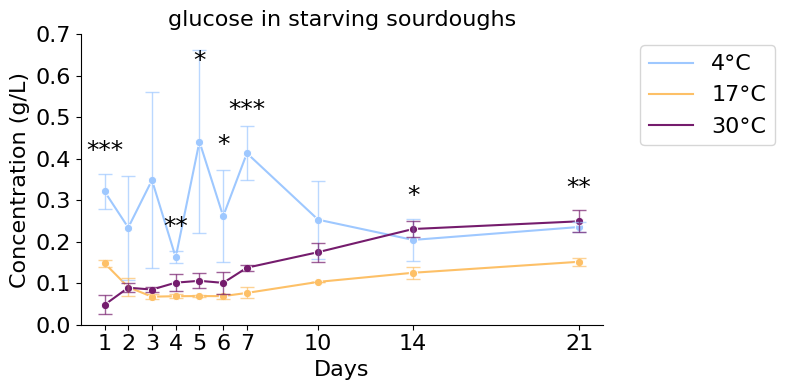

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

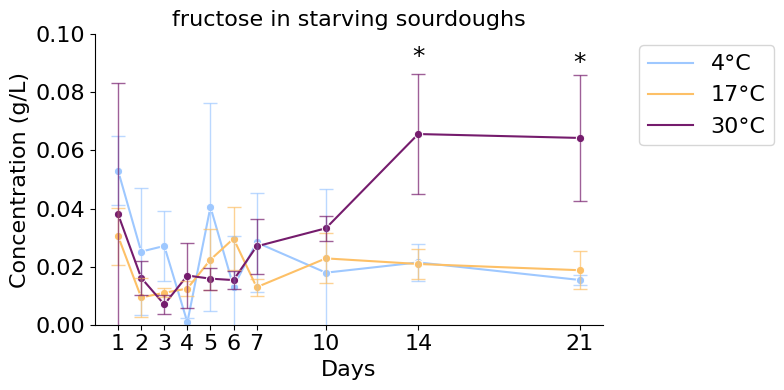

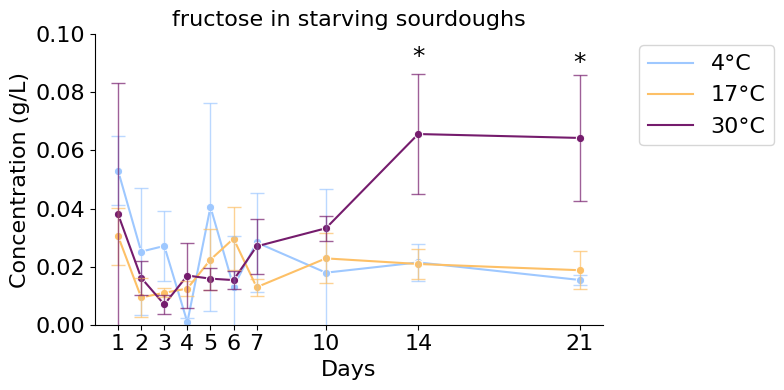

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

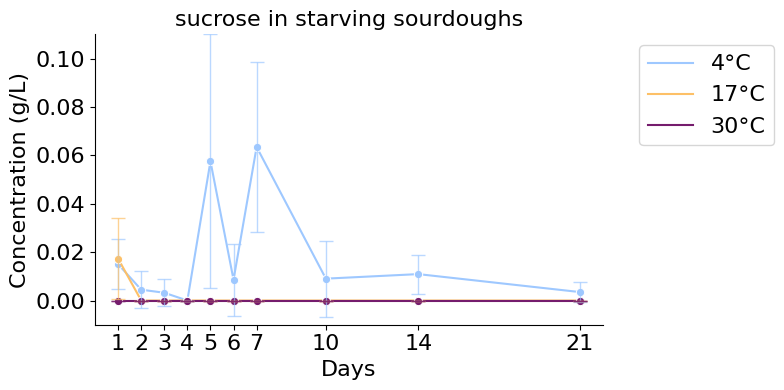

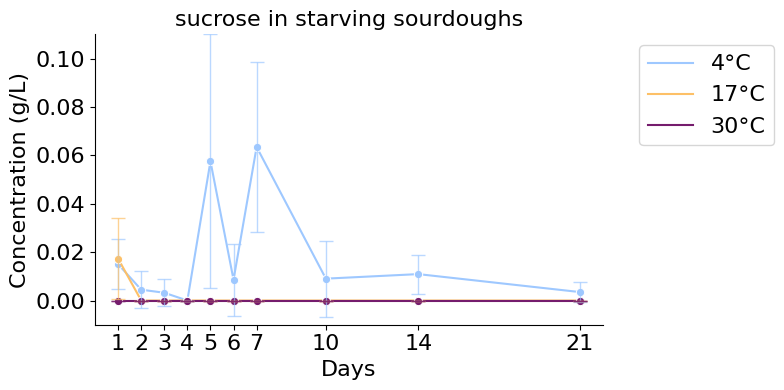

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

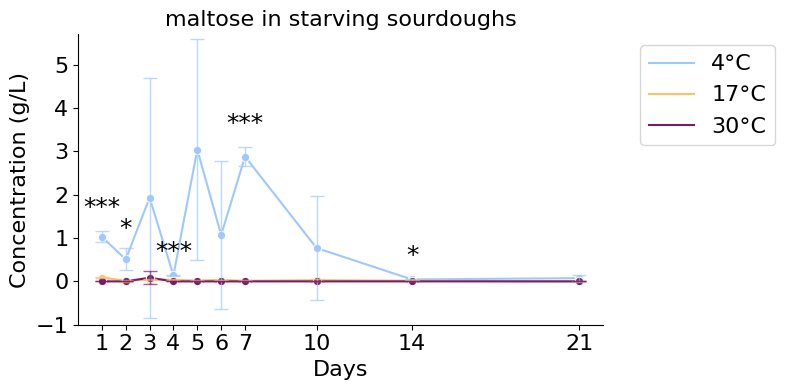

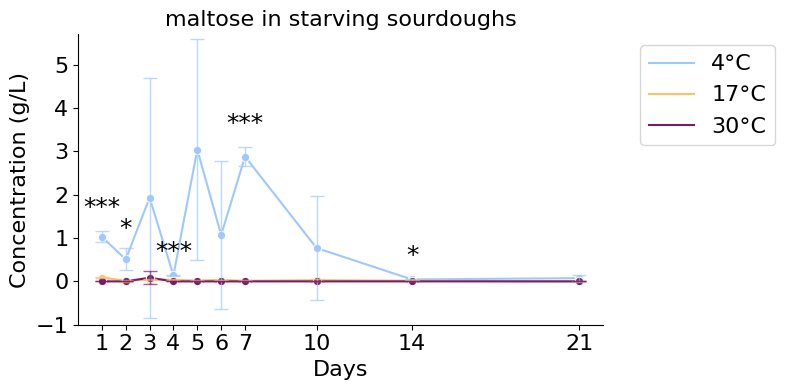

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

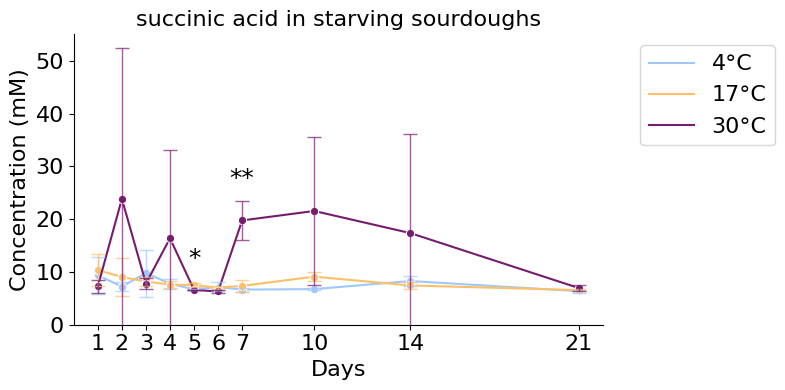

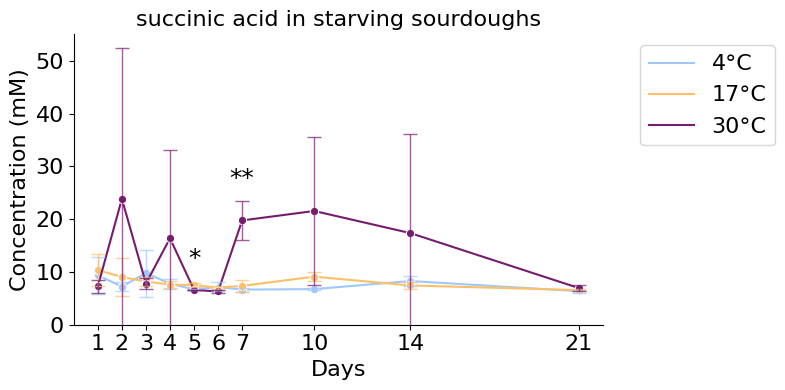

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

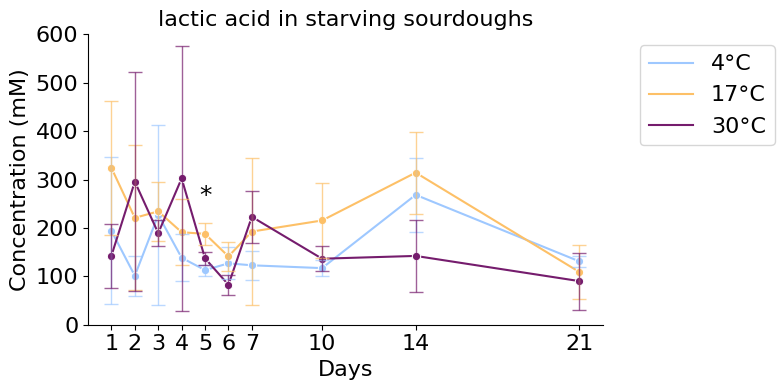

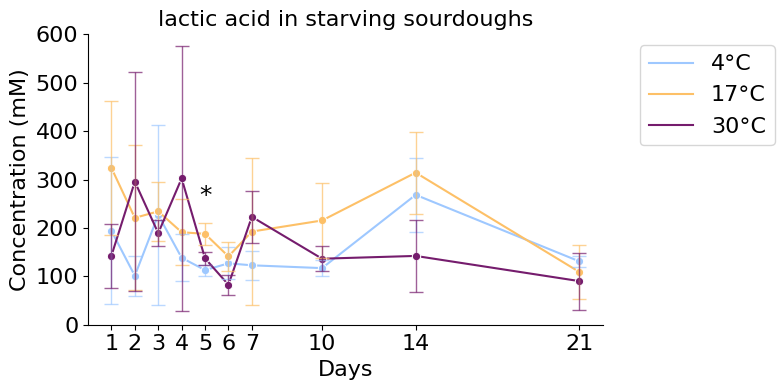

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

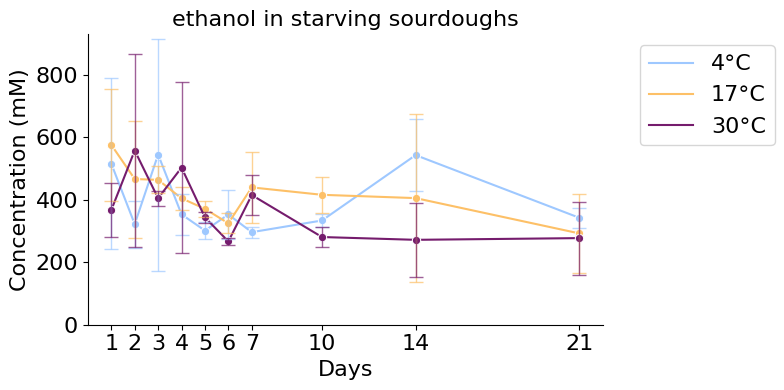

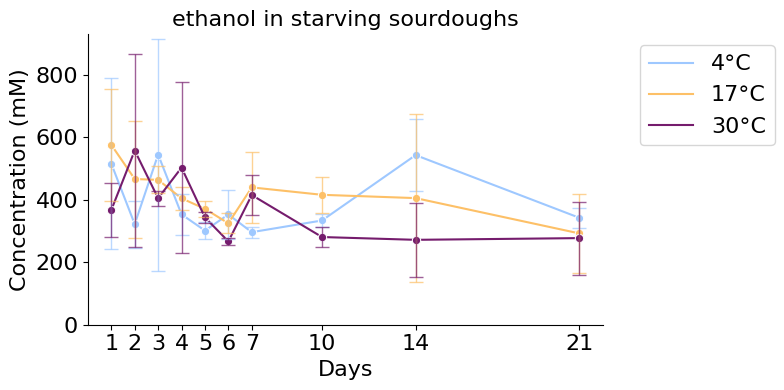

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

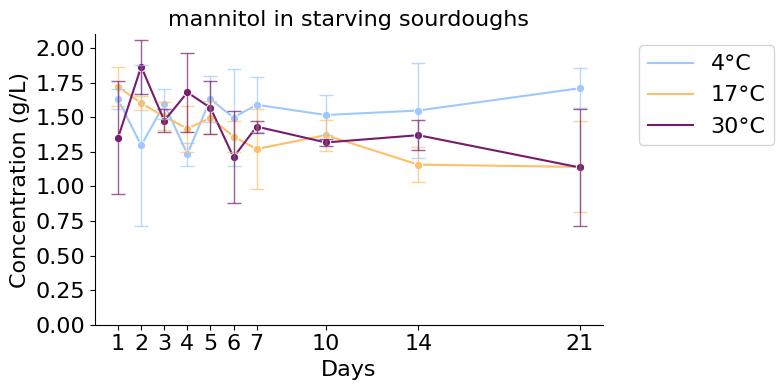

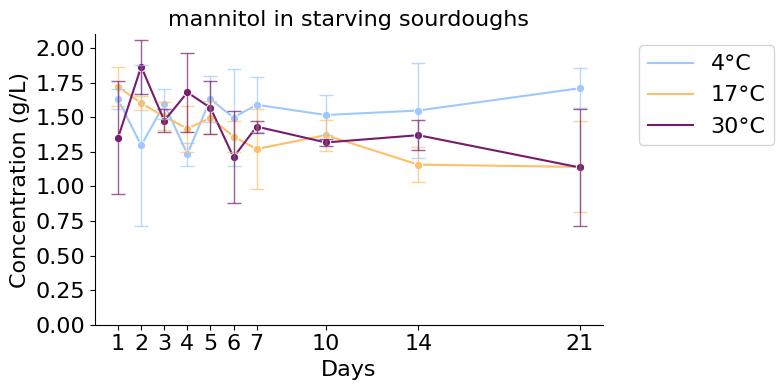

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

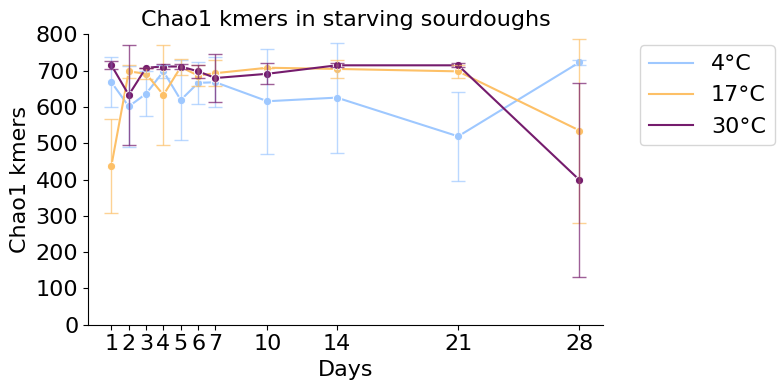

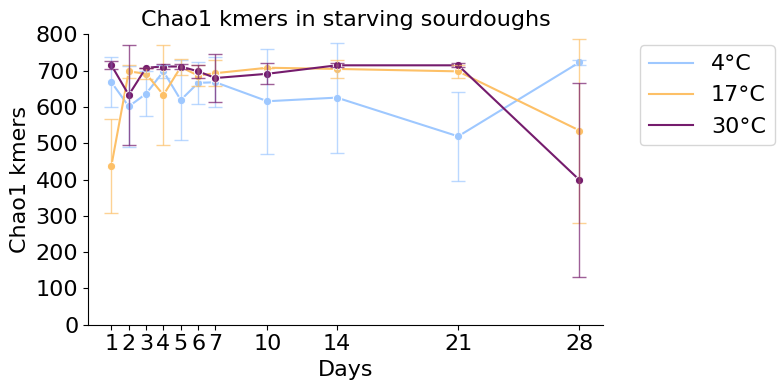

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

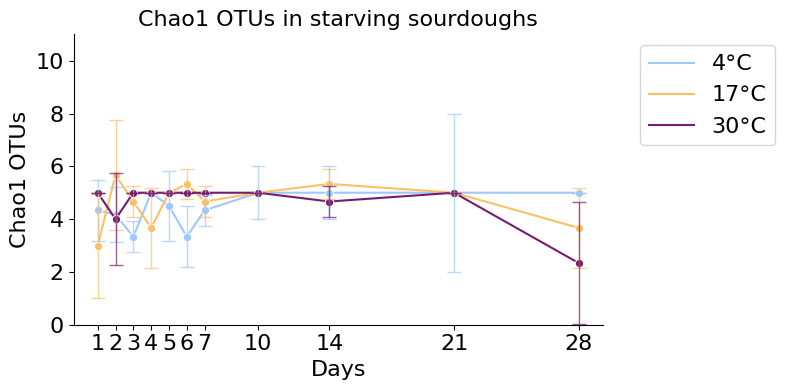

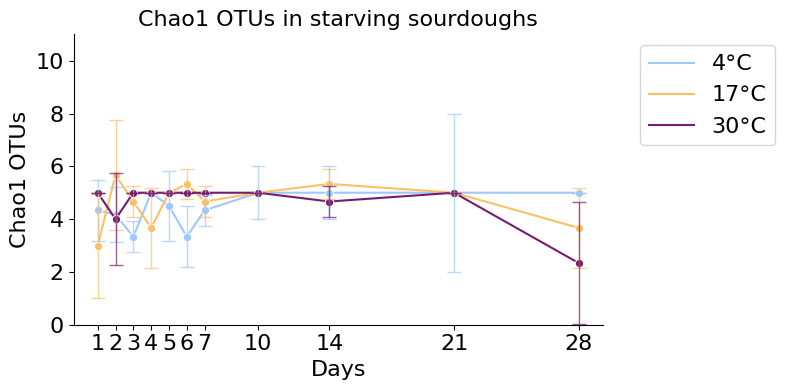

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

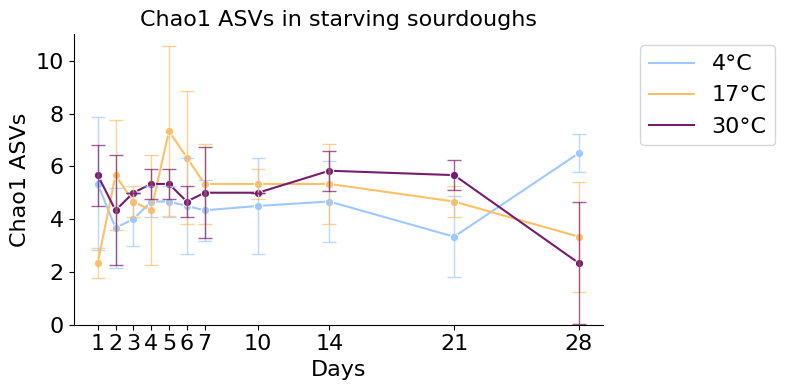

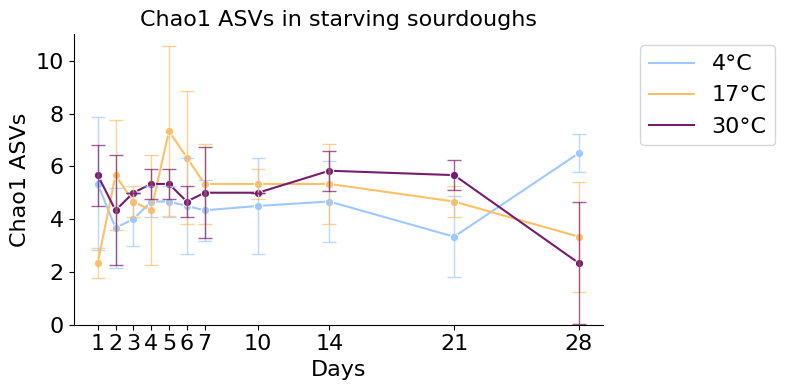

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

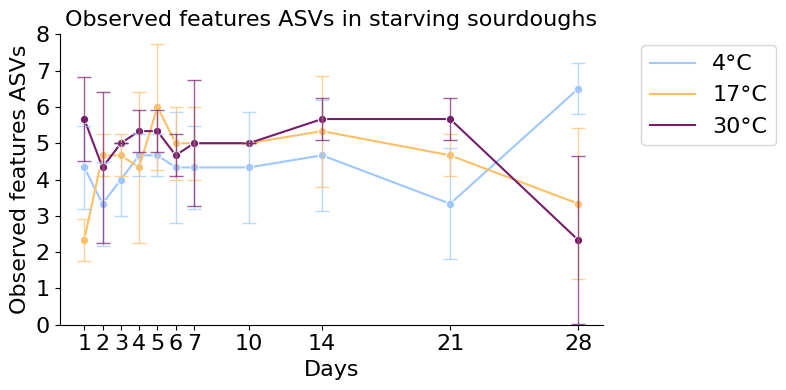

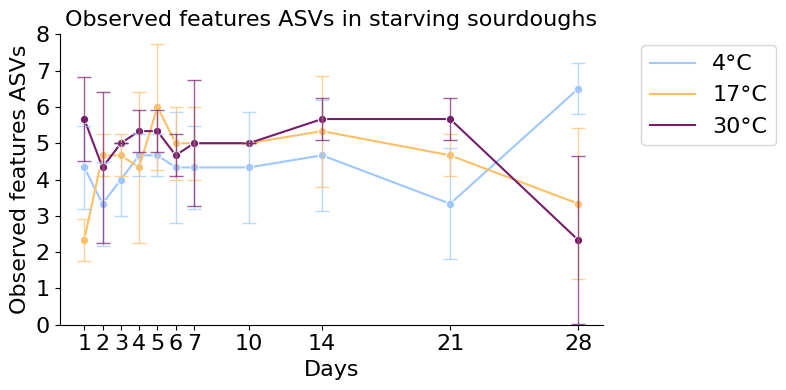

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

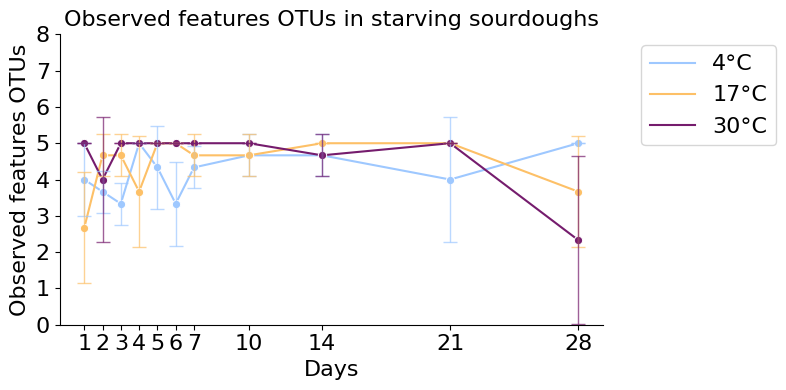

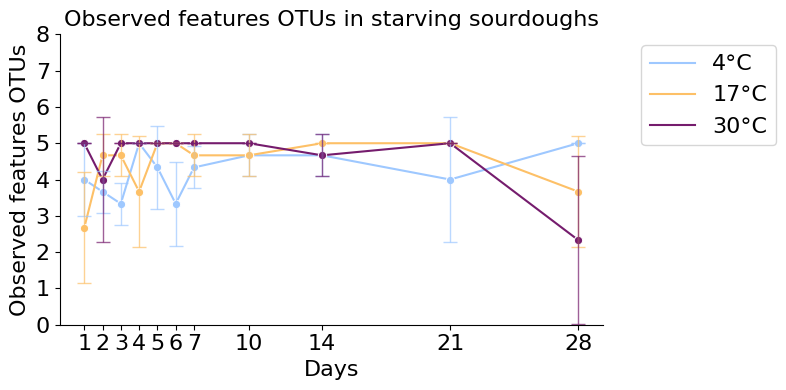

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

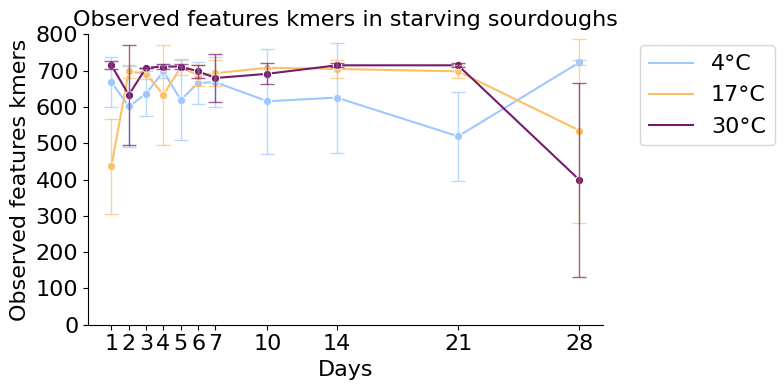

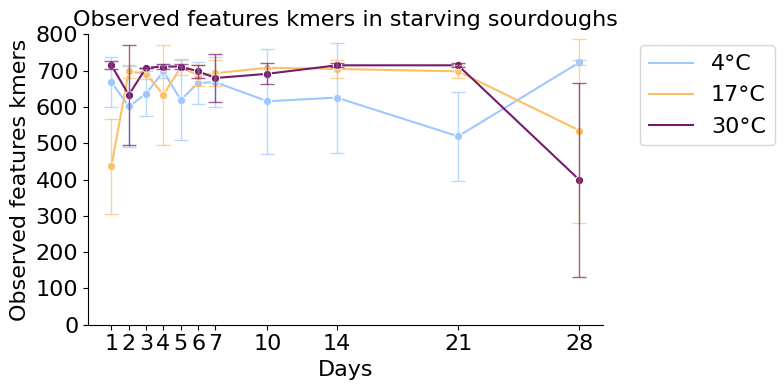

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

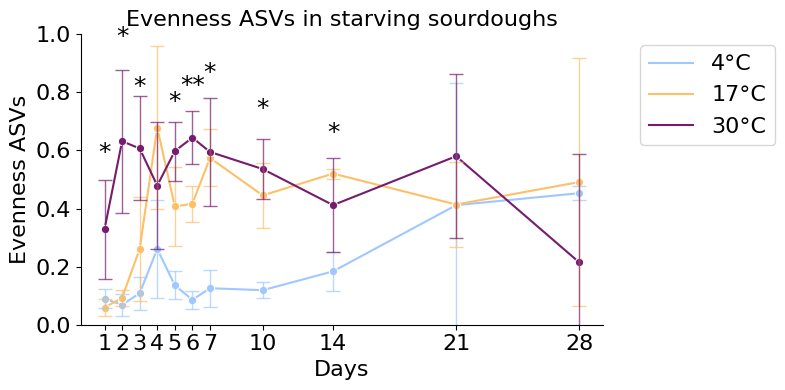

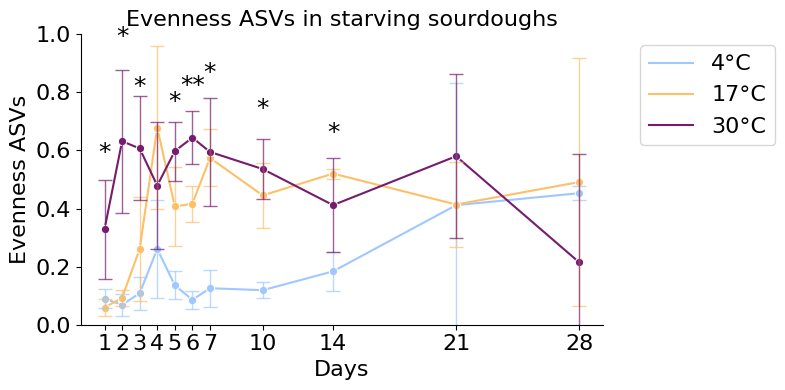

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

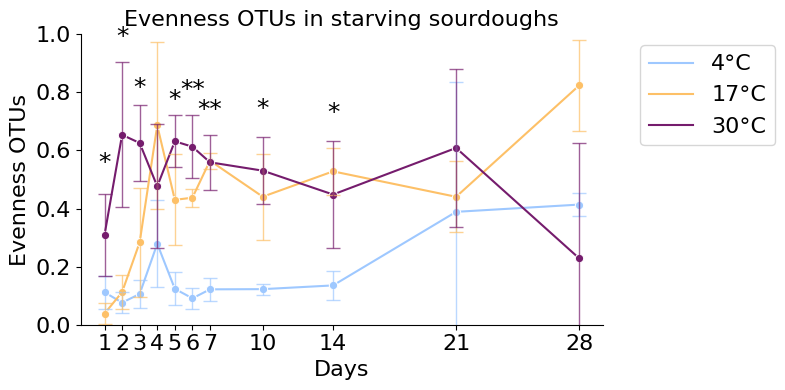

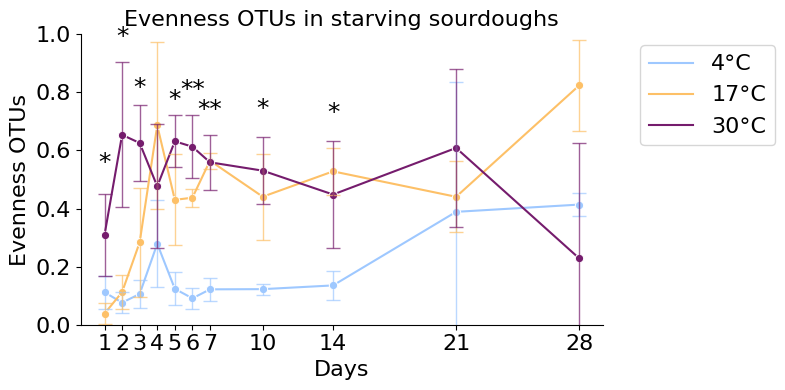

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

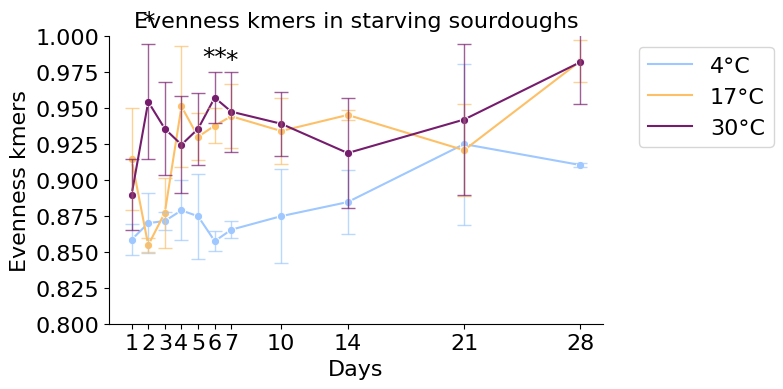

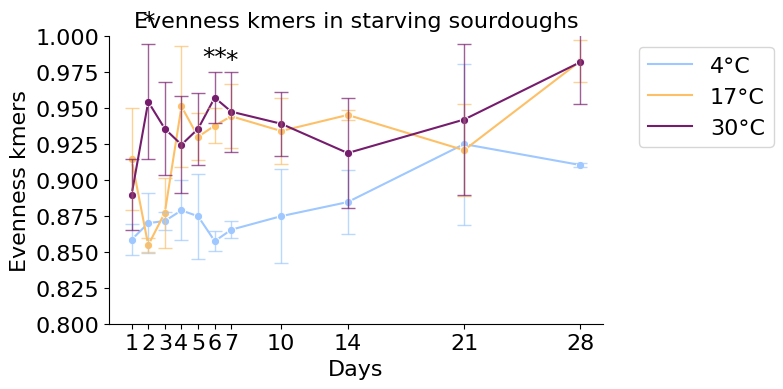

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

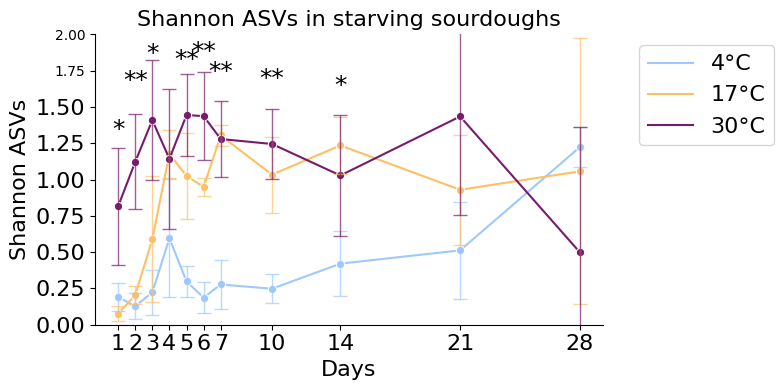

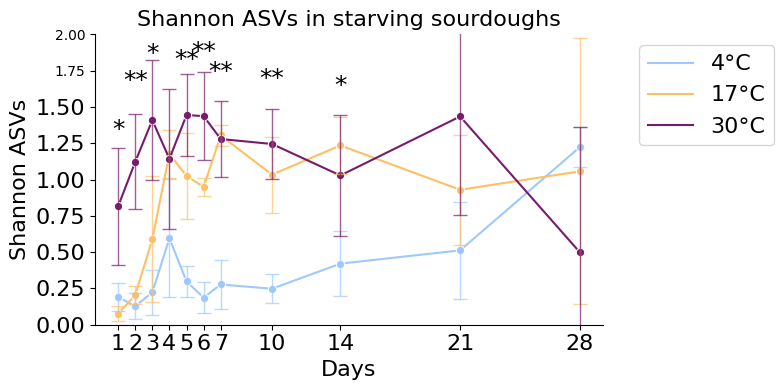

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

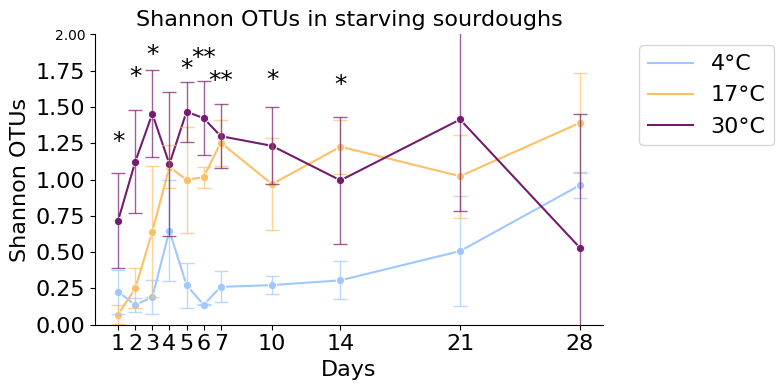

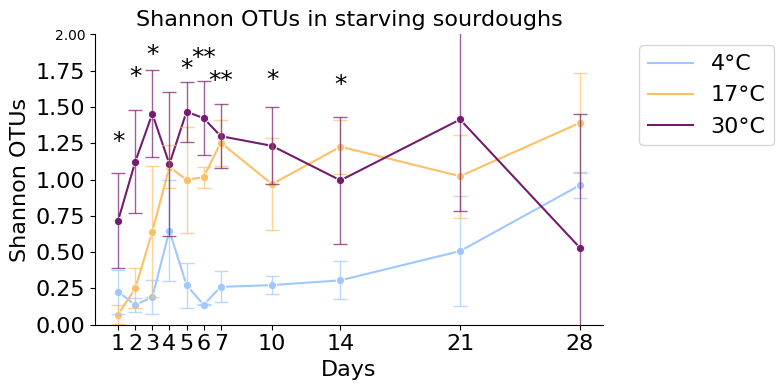

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

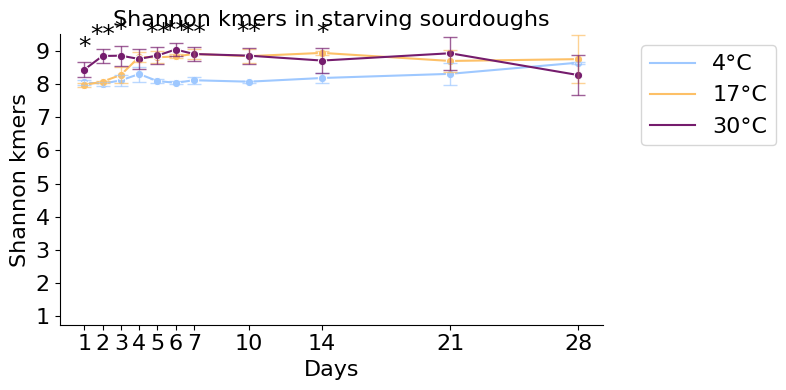

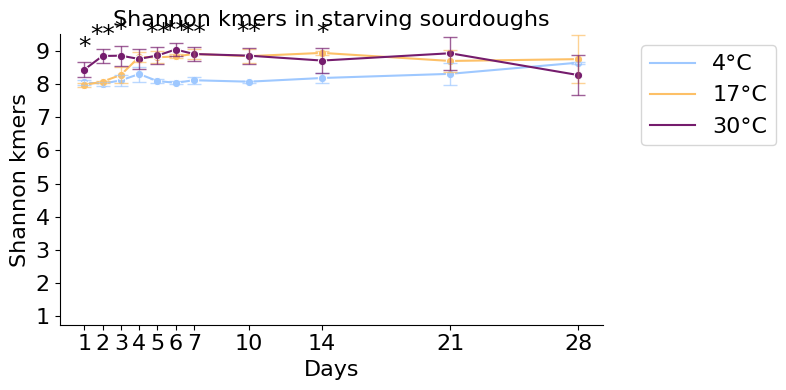

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

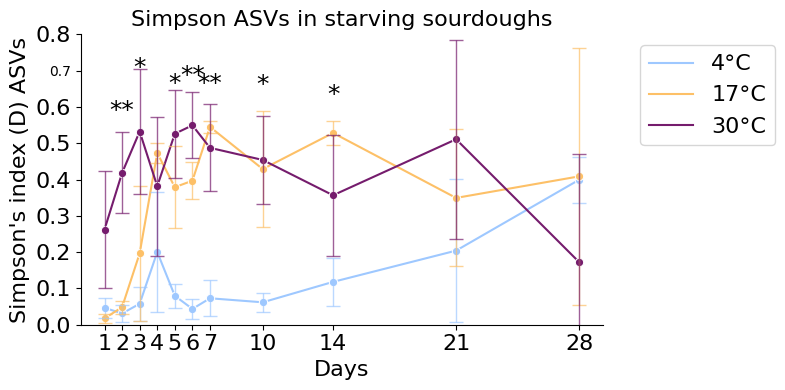

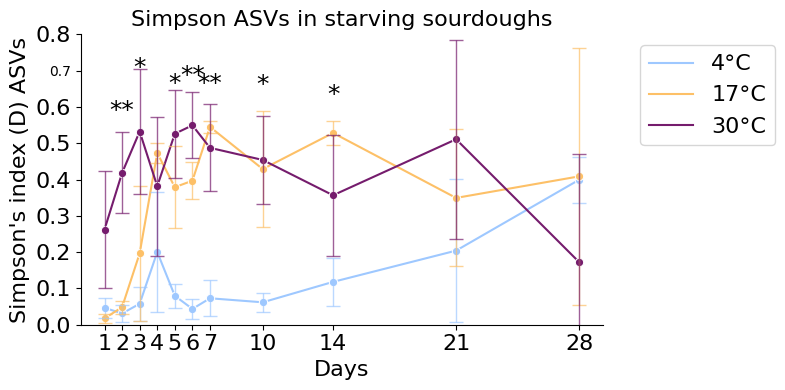

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

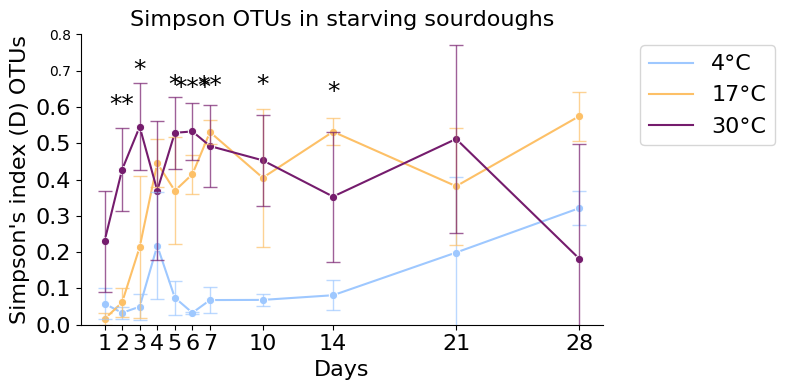

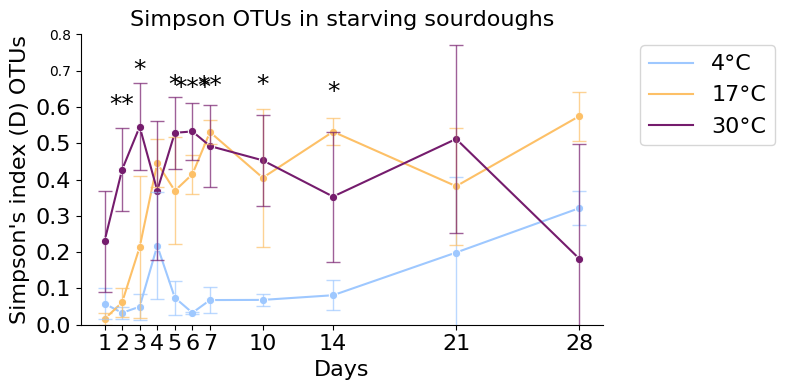

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_43561/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

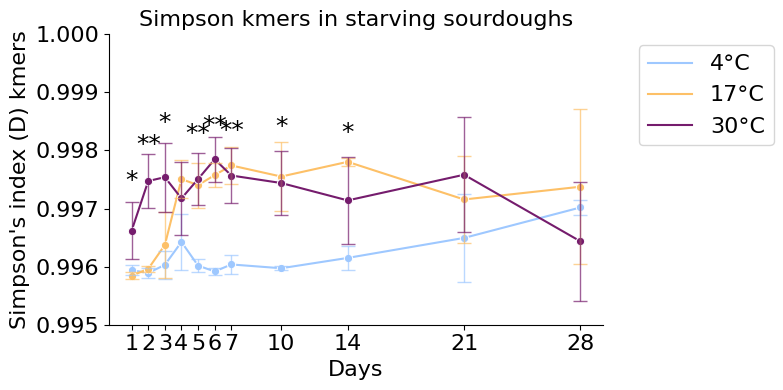

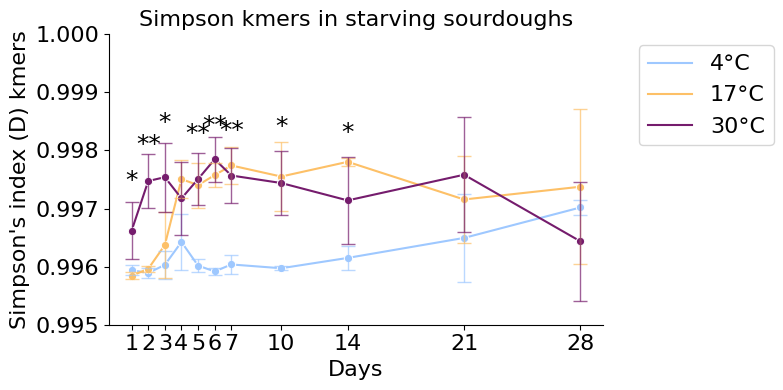

All ANOVA stats exported to: Stats/20250526_anova_results_all_metrics_16S_merged.xlsx


In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import xlsxwriter

# Output paths
fig_dir = "Figures/per_variable_stats_anova/"
os.makedirs(fig_dir, exist_ok=True)
excel_path = "Stats/20250526_anova_results_all_metrics_16S_merged.xlsx"

# Variables to loop over
metrics = {
    'pH': ('pH', 28, 3.3, 4.2),
    'TTA': ('TTA', 28, 0, 33),
    'LAB CFUs': ('log(CFUs)/g of sourdough', 28, 7, 10.5),
    'yeast CFUs': ('log(CFUs)/g of sourdough', 28, 2.5, 8.5),
    'estimate_bact': ('bacterial cells', 28, 0, 2.5e13),
    'DNA yield': ('DNA yield (ng/μL)', 28, 0, 35),
    'acetic acid': ('Concentration (mM)', 21, 0, 700),
    'glucose': ('Concentration (g/L)', 21, 0, 0.7),
    'fructose': ('Concentration (g/L)', 21, 0, 0.1),
    'sucrose': ('Concentration (g/L)', 21, -0.01, 0.11),
    'maltose': ('Concentration (g/L)', 21, -1, 5.7),
    'succinic acid': ('Concentration (mM)', 21, 0, 55),
    'lactic acid': ('Concentration (mM)', 21, 0, 600),
    'ethanol': ('Concentration (mM)', 21, 0, 930),
    'mannitol': ('Concentration (g/L)', 21, 0, 2.1),
    'Chao1 kmers': ('Chao1 kmers', 28, 0, 800),
    'Chao1 OTUs': ('Chao1 OTUs', 28, 0, 11),
    'Chao1 ASVs': ('Chao1 ASVs', 28, 0, 11),
    'Observed features ASVs': ('Observed features ASVs', 28, 0, 8),
    'Observed features OTUs': ('Observed features OTUs', 28, 0, 8),
    'Observed features kmers': ('Observed features kmers', 28, 0, 800),
    'Evenness ASVs': ('Evenness ASVs', 28, 0, 1),
    'Evenness OTUs': ('Evenness OTUs', 28, 0, 1),
    'Evenness kmers': ('Evenness kmers', 28, 0.8, 1),
    'Shannon ASVs': ('Shannon ASVs', 28, 0, 2),
    'Shannon OTUs': ('Shannon OTUs', 28, 0, 2),
    'Shannon kmers': ('Shannon kmers', 28, 0.74, 9.5),
    'Simpson ASVs': ("Simpson's index (D) ASVs", 28, 0, 0.8),
    'Simpson OTUs': ("Simpson's index (D) OTUs", 28, 0, 0.8),
    'Simpson kmers': ("Simpson's index (D) kmers", 28, 0.995, 1)
}


# Excel writer
excel_writer = pd.ExcelWriter(excel_path, engine='xlsxwriter')

for var, (ylab, max_day, bottom, top) in metrics.items():
    title = f"{var} in starving sourdoughs"
    filename = os.path.join(fig_dir, f"20250526_ANOVA_{var.replace(' ', '_')}.pdf")

    fig, result_df = plot_alpha_diversity(
        data=md,
        value_col=var,
        title=title,
        ylabel=ylab,
        return_stats=True,
        max_day=max_day,
        bottom= bottom,
        top=top
    )

    fig.savefig(filename, format='pdf', bbox_inches='tight')
    display(fig)
    plt.close(fig)

    result_df.to_excel(excel_writer, sheet_name=var[:31], index=False)


# Save workbook
excel_writer.close()
print(f"All ANOVA stats exported to: {excel_path}")


In [20]:
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_days_with_significance_letters(data, value_col, temperature_value,
                                        title="", ylabel="", colors=None,
                                        figsize=(8, 4), text_y_offset=0.05,
                                        return_stats=False):
    """
    Plot boxplots for one temperature group across days with Tukey HSD letters.
    Optionally returns the Tukey HSD stats table.
    """
    # Subset
    df = data[data['temperature'] == temperature_value].copy()
    df = df.dropna(subset=[value_col, 'day'])

    df['day'] = df['day'].astype(int)
    df['day_str'] = df['day'].astype(str)

    # Tukey HSD
    mc = MultiComparison(df[value_col], df['day_str'])
    tukey = mc.tukeyhsd()

    # Convert summary to DataFrame
    summary_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
    summary_df['reject'] = summary_df['reject'].astype(str) == 'True'

    # Compact letter display
    def get_cld_from_summary(summary_df):
        from collections import defaultdict
        groups = sorted(set(summary_df['group1']) | set(summary_df['group2']))
        group_dict = {g: set() for g in groups}
        current_letter = ord('a')
        remaining = set(groups)

        while remaining:
            this_letter = chr(current_letter)
            this_group = sorted(remaining)[0]
            compatible = {this_group}
            for g in remaining:
                mask1 = (summary_df['group1'] == this_group) & (summary_df['group2'] == g)
                mask2 = (summary_df['group1'] == g) & (summary_df['group2'] == this_group)
                is_sig = summary_df[mask1 | mask2]['reject'].any()
                if not is_sig:
                    compatible.add(g)
            for g in compatible:
                group_dict[g].add(this_letter)
            remaining -= compatible
            current_letter += 1
        return {k: ''.join(sorted(v)) for k, v in group_dict.items()}

    letter_map = get_cld_from_summary(summary_df)

    # Plotting
    plt.figure(figsize=figsize)
    day_order = sorted(df['day'].unique())
    box_palette = (df.groupby('day')['color'].first().reindex(day_order).to_dict()
                   if colors is not None else None)

    sns.boxplot(data=df, x='day', y=value_col, palette=box_palette, order=day_order)
    sns.stripplot(data=df, x='day', y=value_col, color='black', size=4, jitter=True, order=day_order)

    # Add letters
    max_vals = df.groupby('day')[value_col].max()
    for i, day in enumerate(day_order):
        label = letter_map.get(str(day), "")
        y = max_vals.loc[day] + text_y_offset * (max_vals.max() - max_vals.min())
        plt.text(i, y, label, ha='center', va='bottom', fontsize=18, fontweight='bold')

    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.xlabel("Days", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    sns.despine()
    plt.tight_layout()

    if return_stats:
        return plt.gcf(), summary_df
    else:
        return plt.gcf()



/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


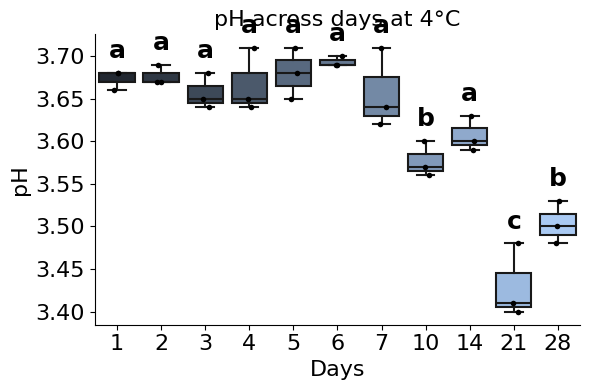

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


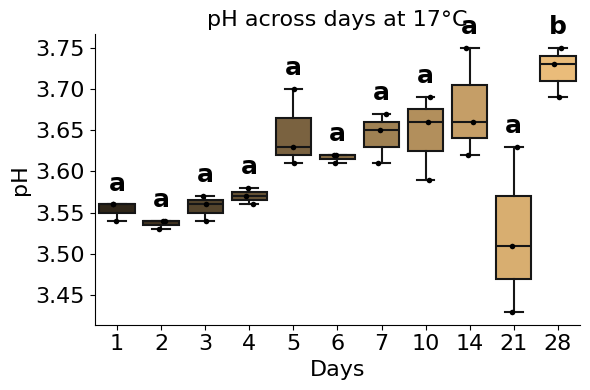

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


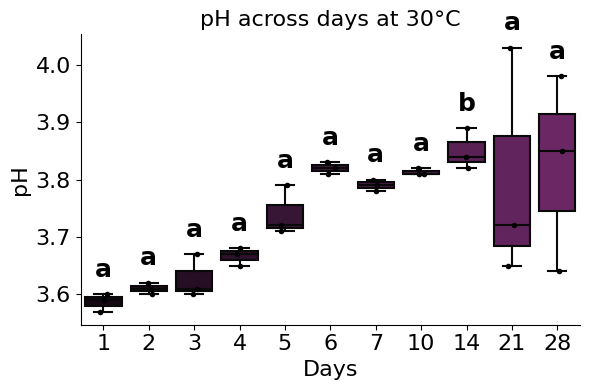

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


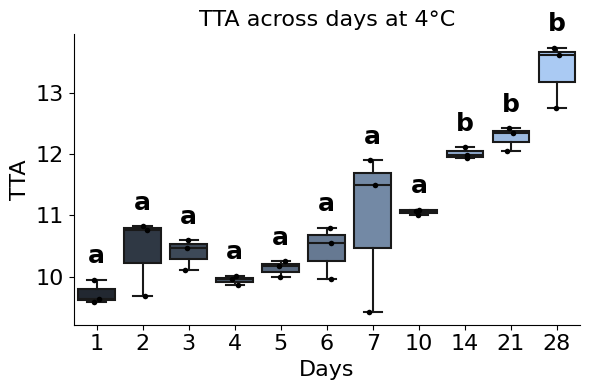

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


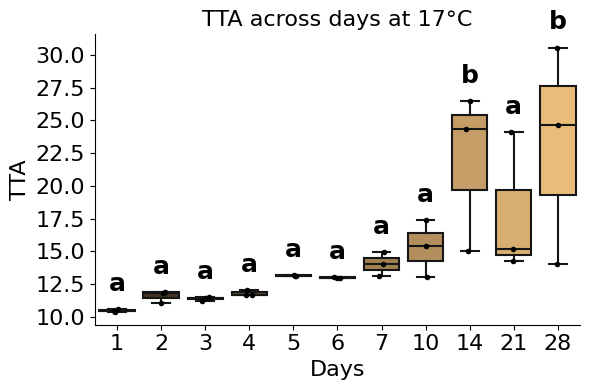

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


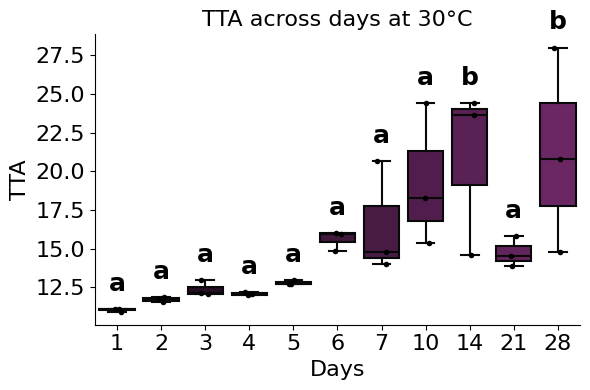

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


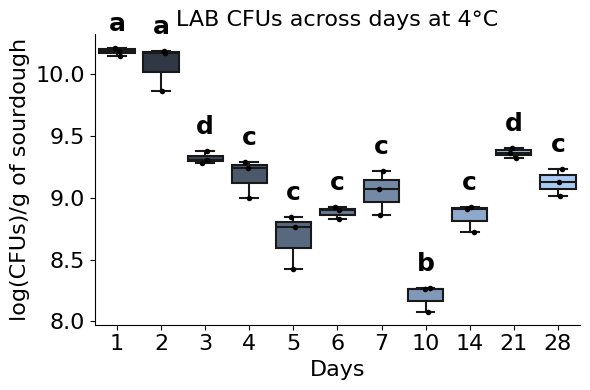

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


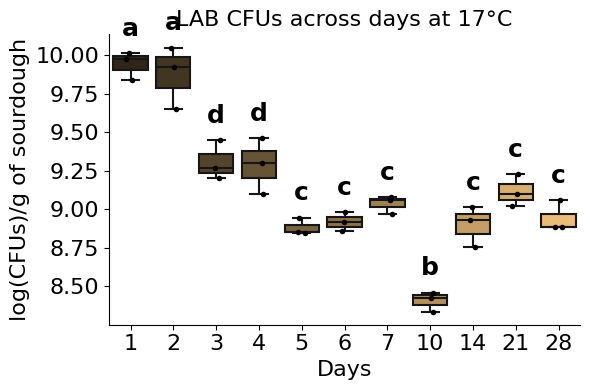

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


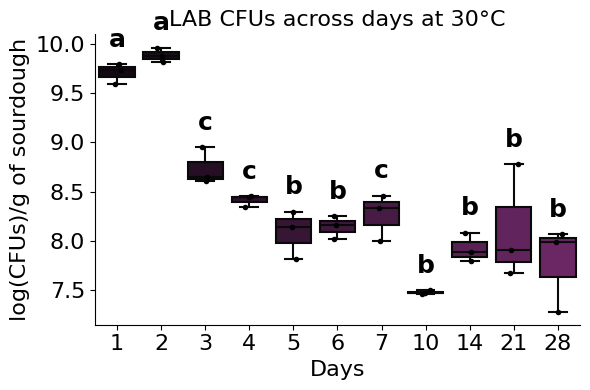

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


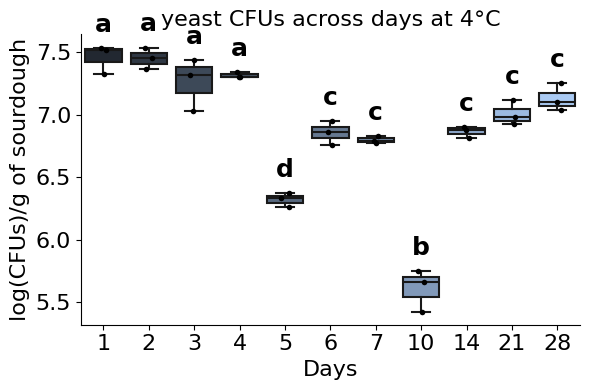

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


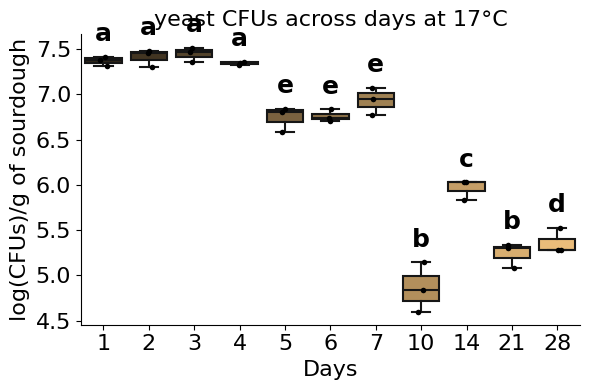

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


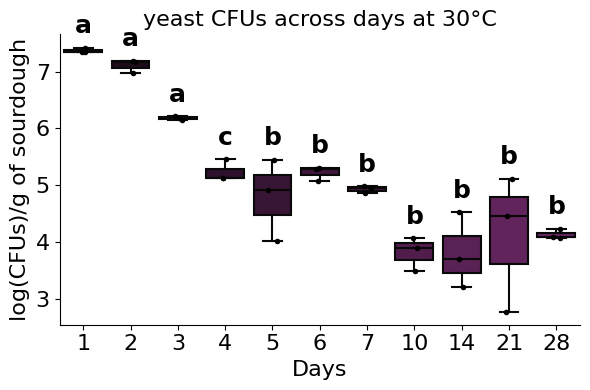

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


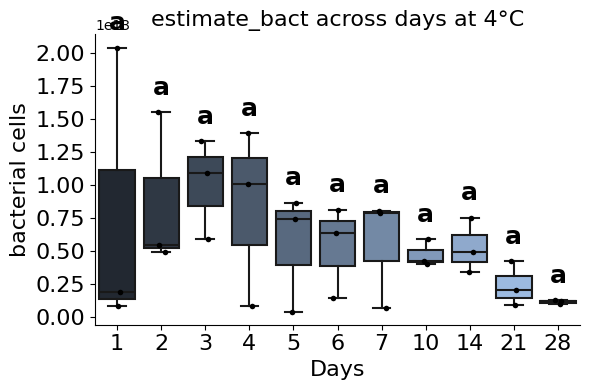

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


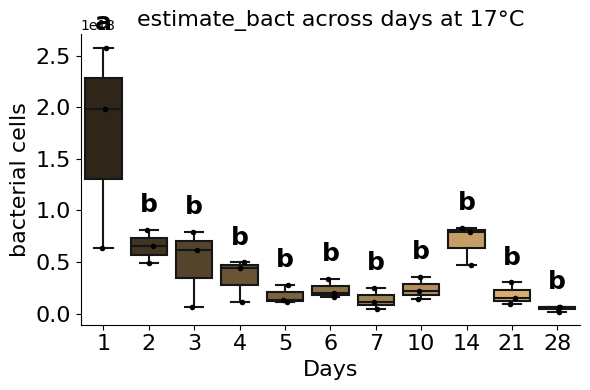

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


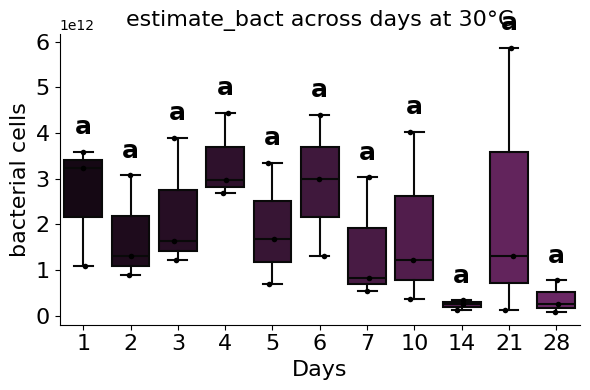

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


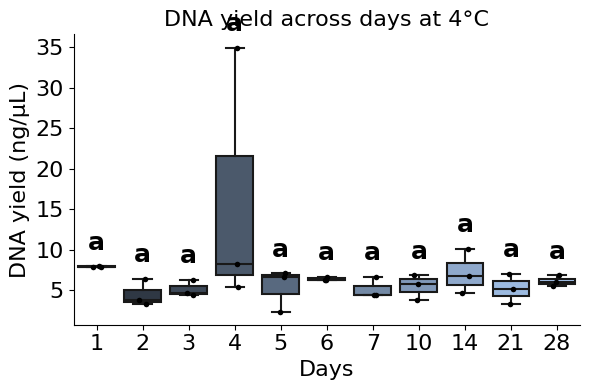

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


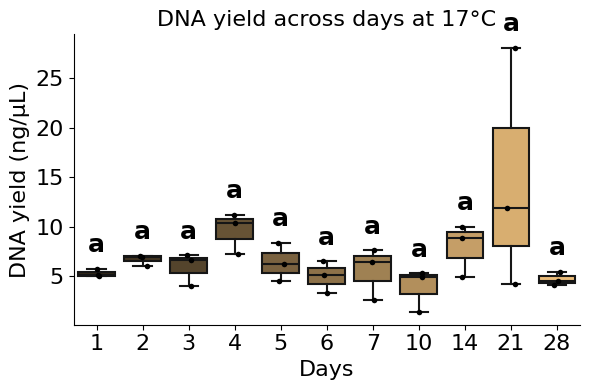

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


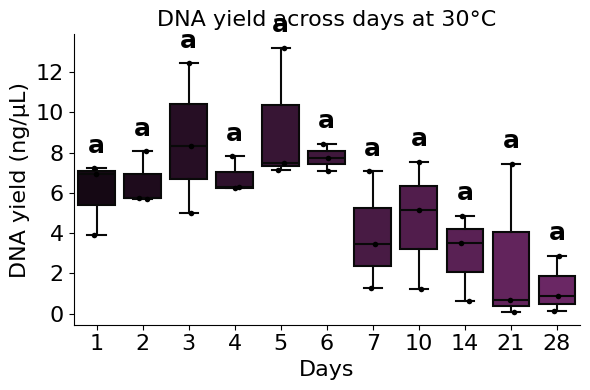

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


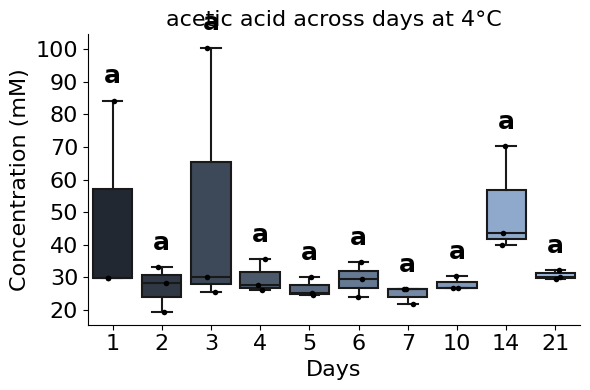

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


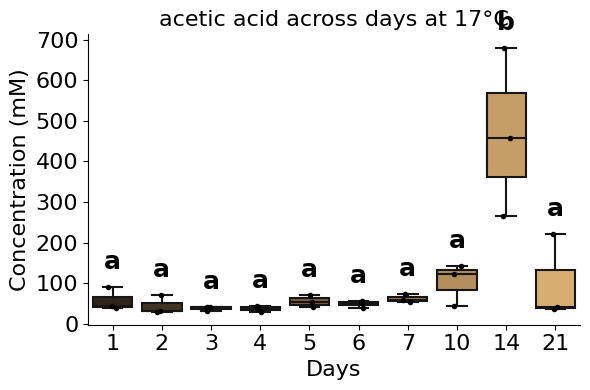

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


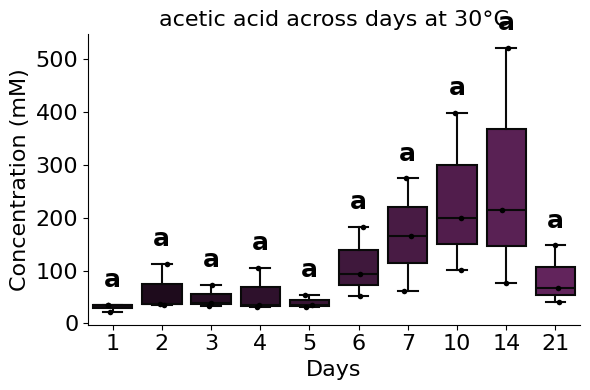

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


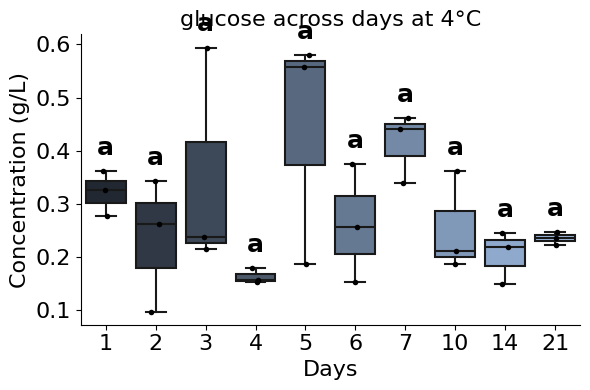

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


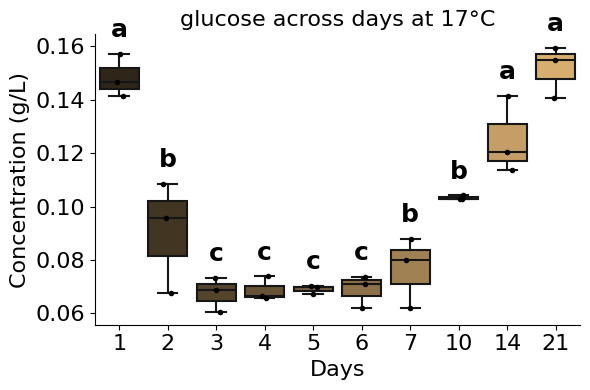

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


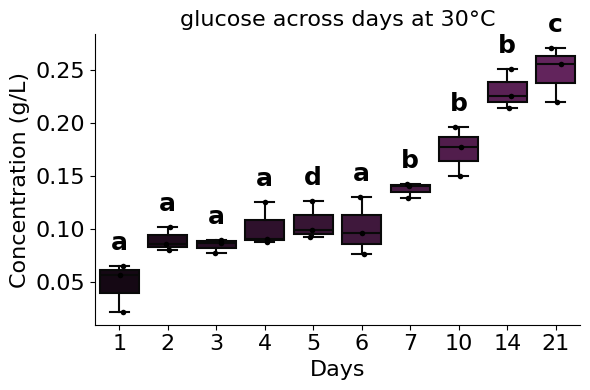

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


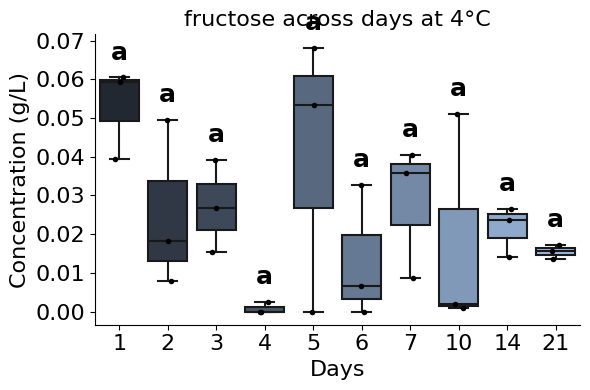

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


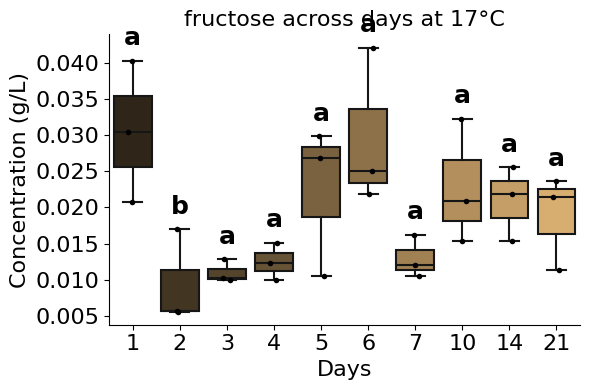

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


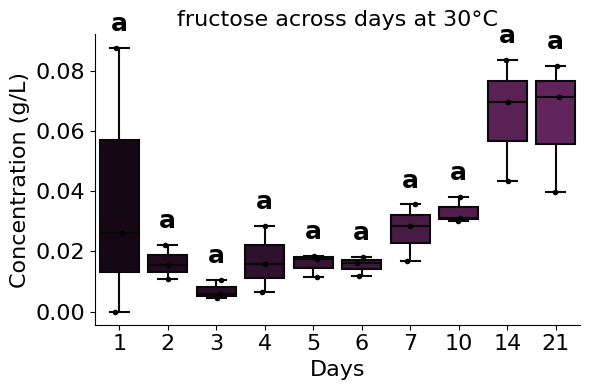

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


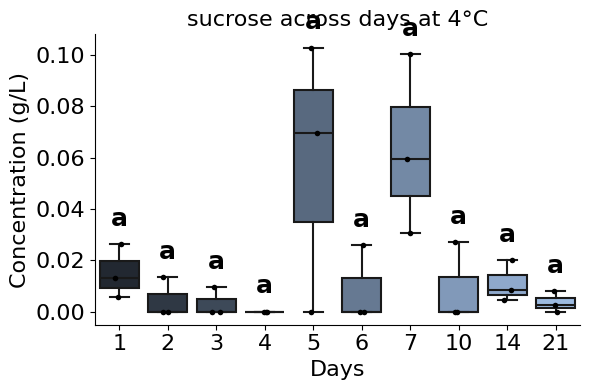

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


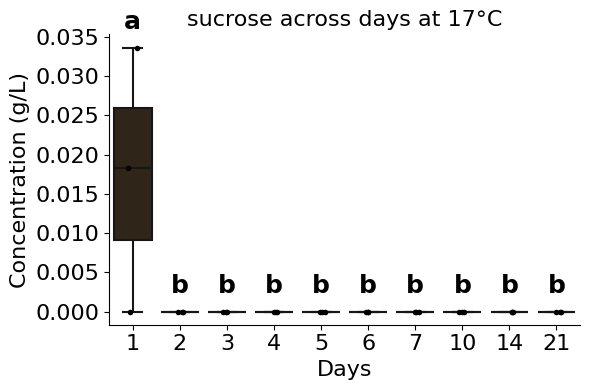

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: invalid value encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When

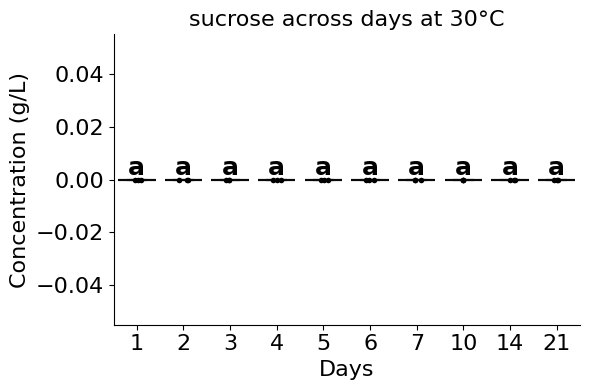

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


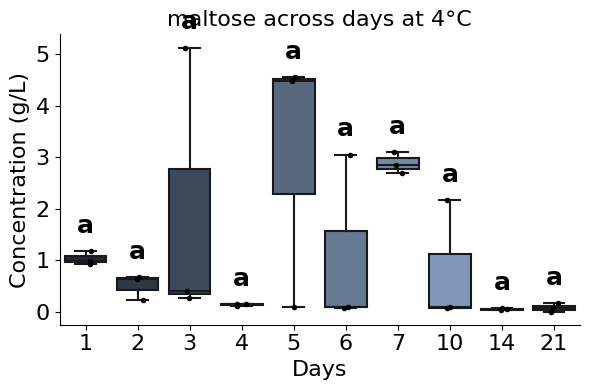

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


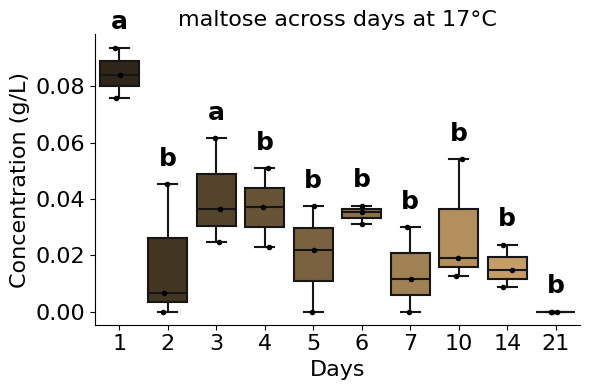

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


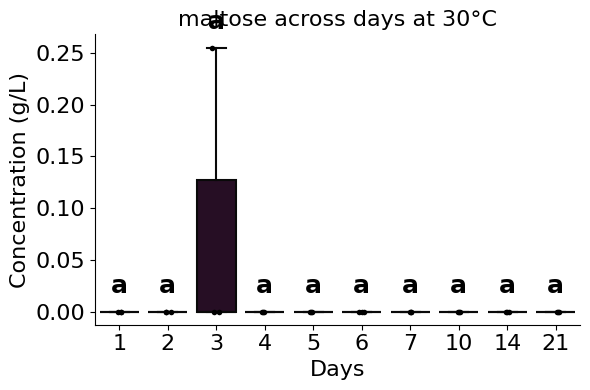

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


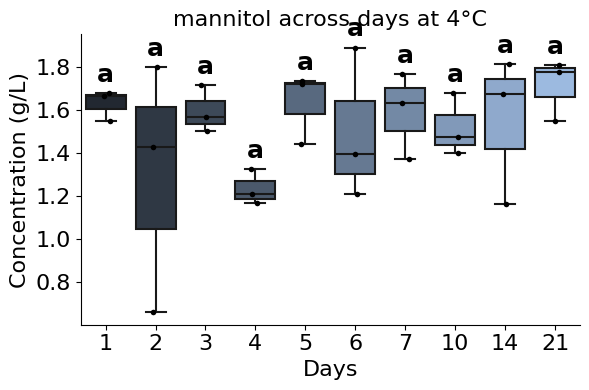

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


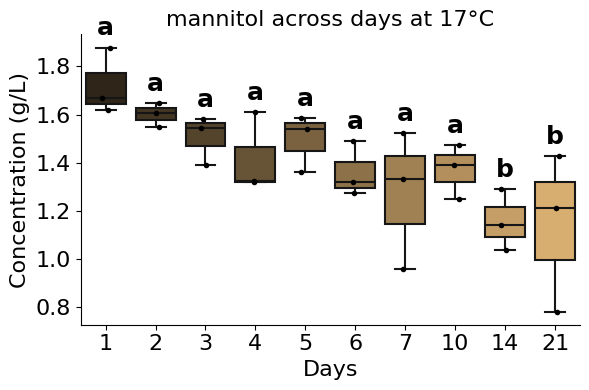

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


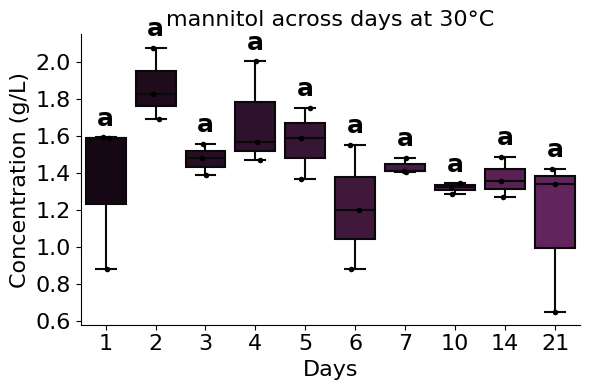

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


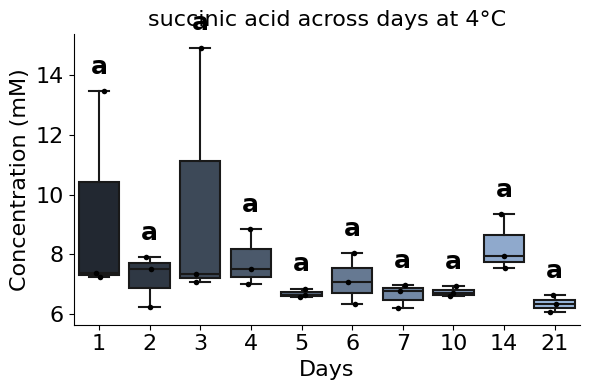

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


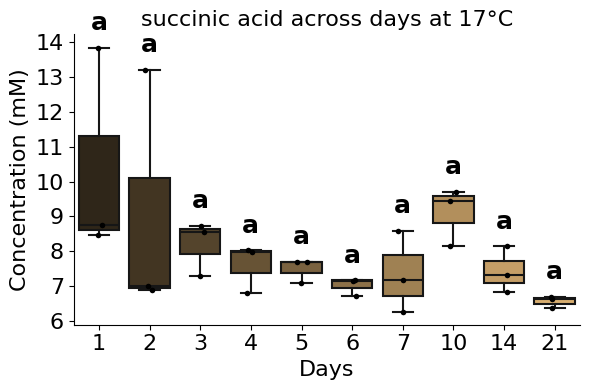

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


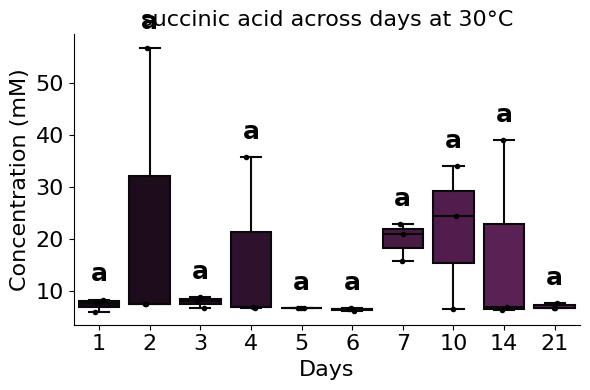

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


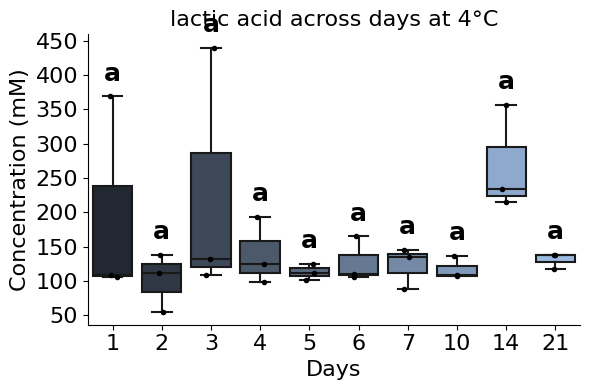

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


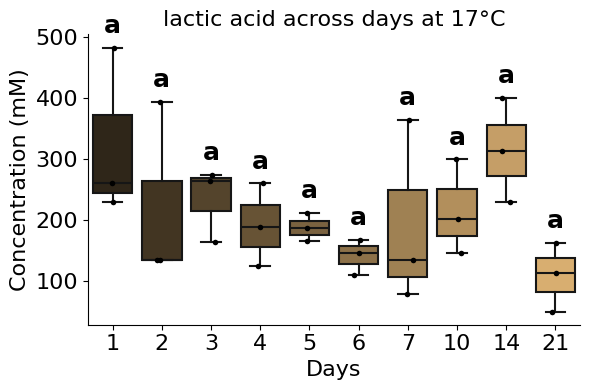

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


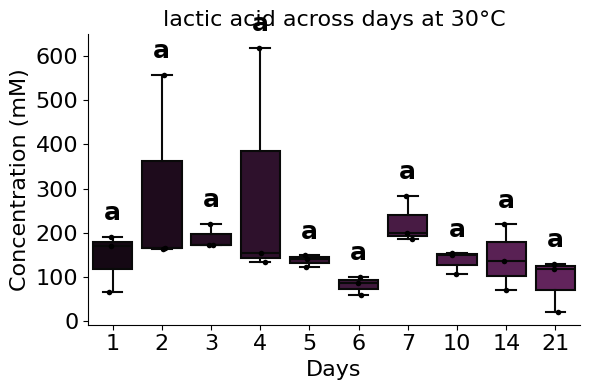

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


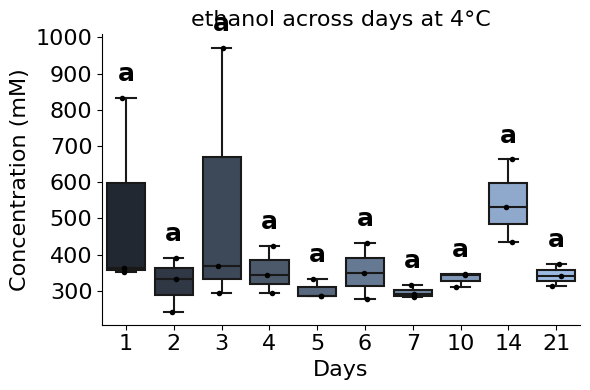

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


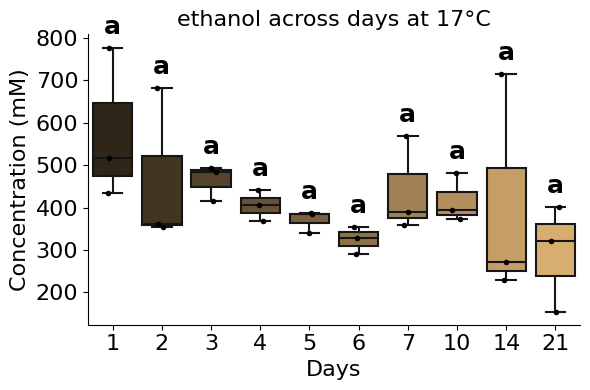

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


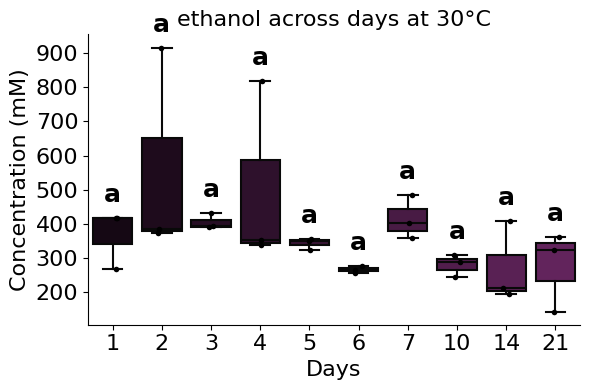

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


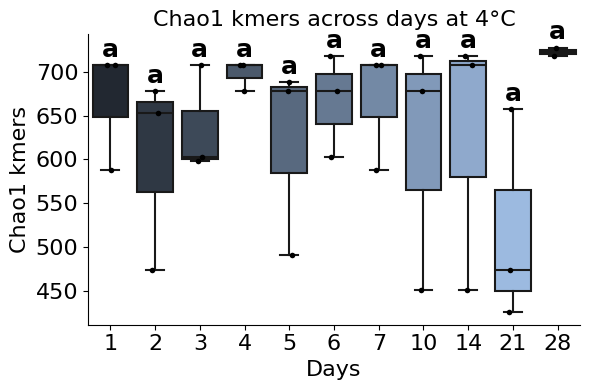

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


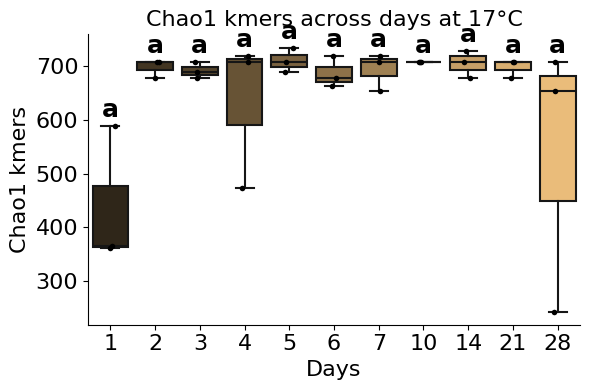

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


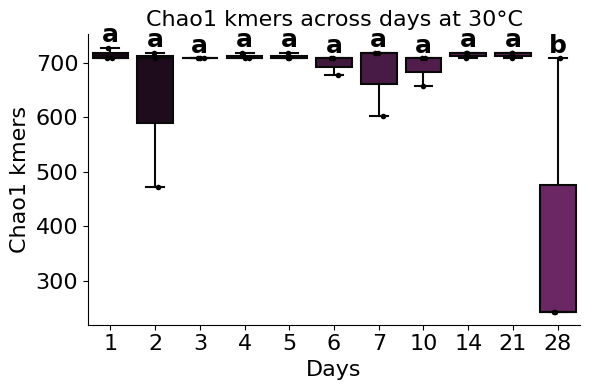

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


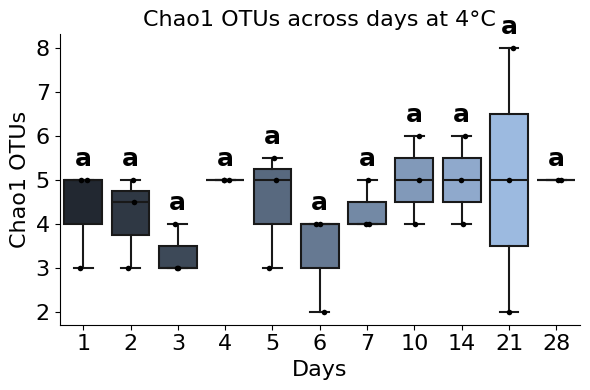

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


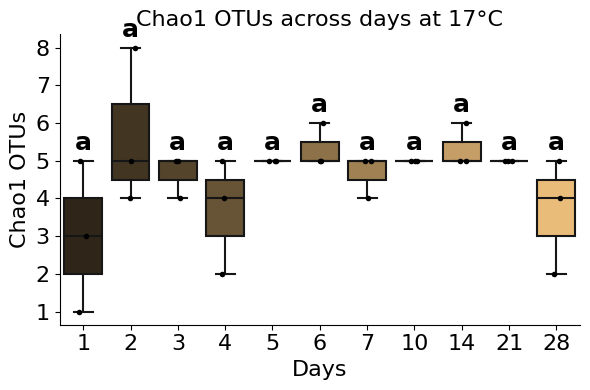

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


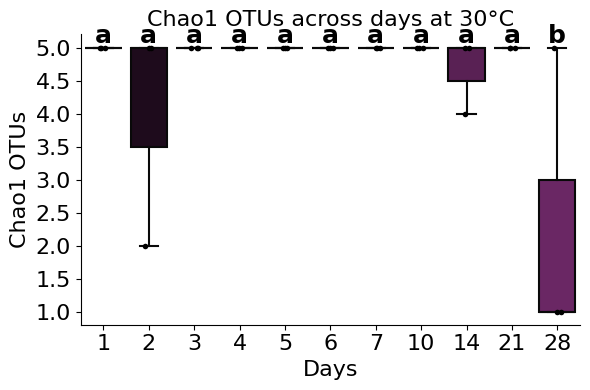

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


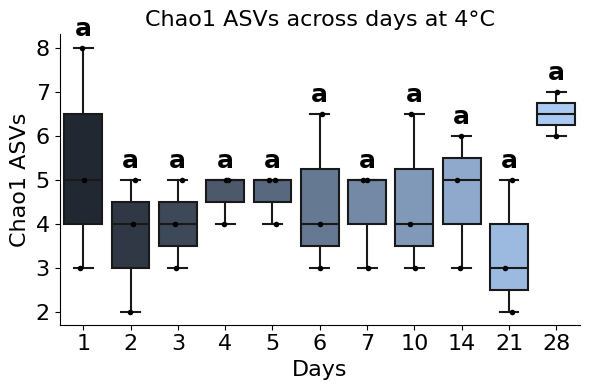

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


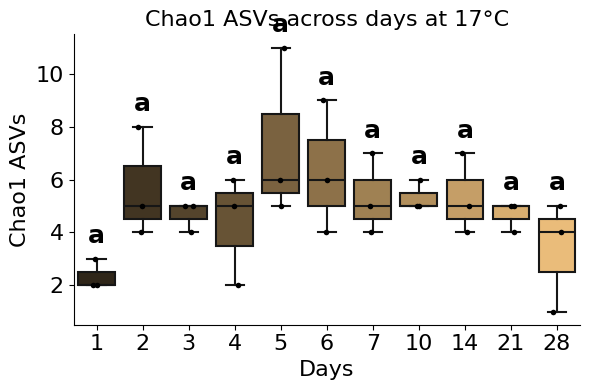

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


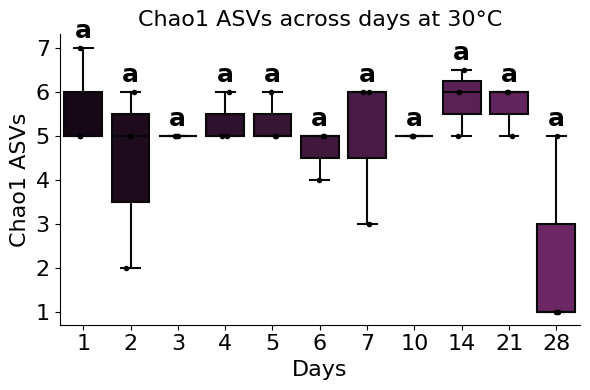

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


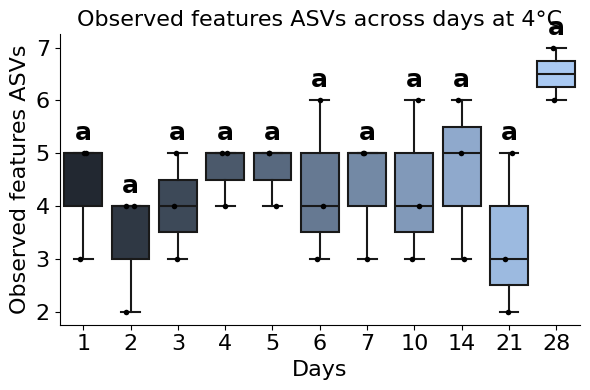

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


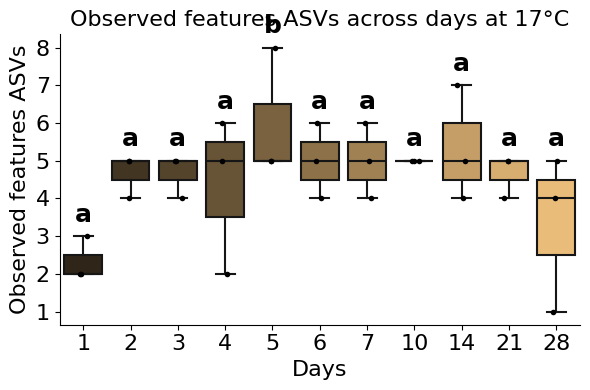

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


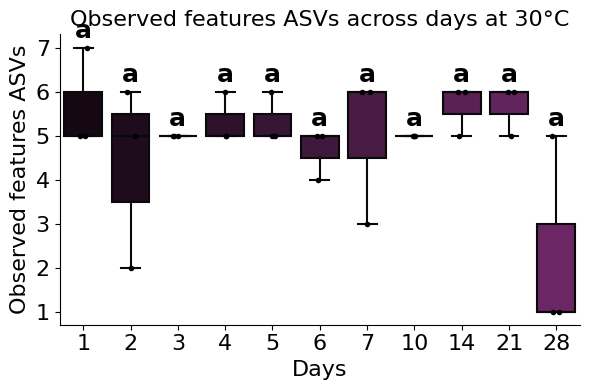

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


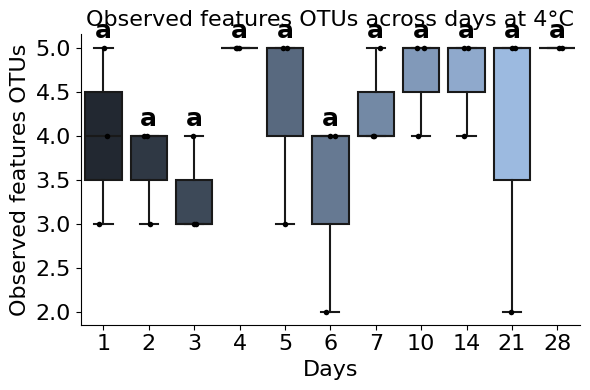

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


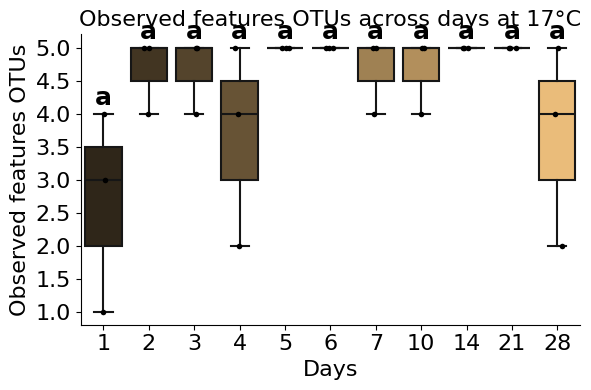

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


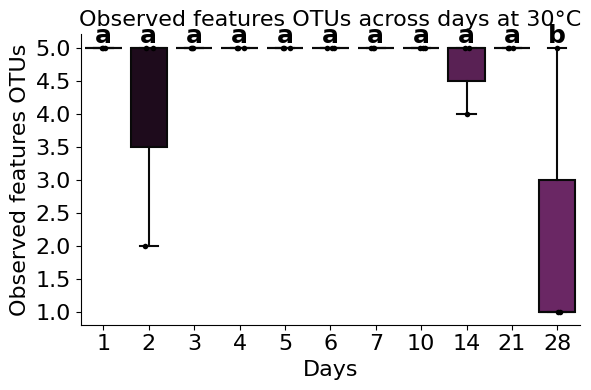

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


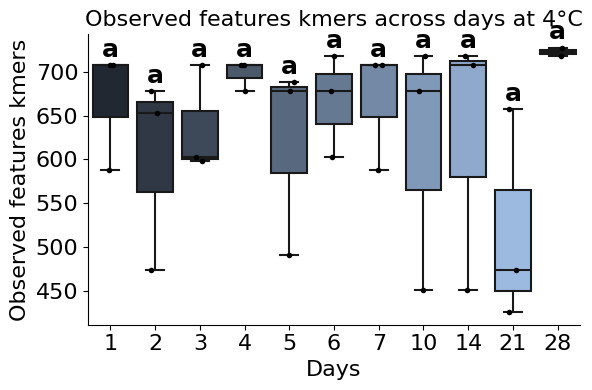

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


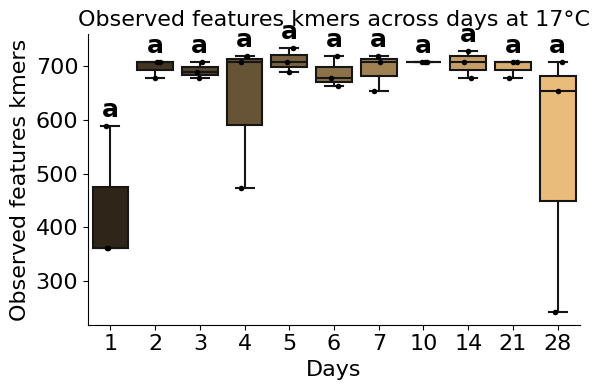

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


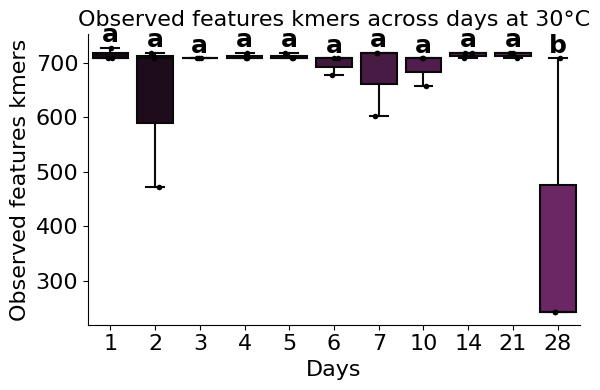

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


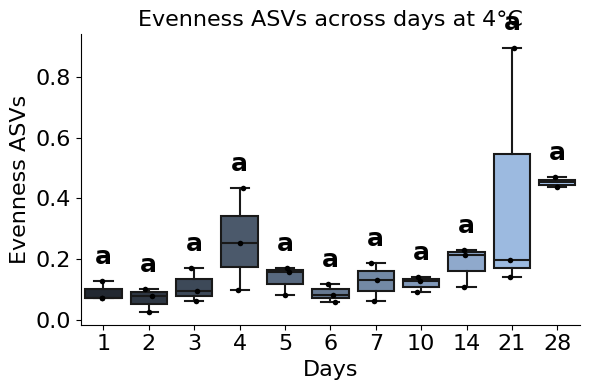

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


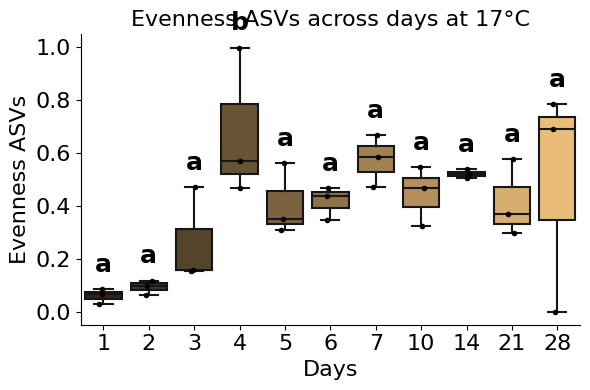

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


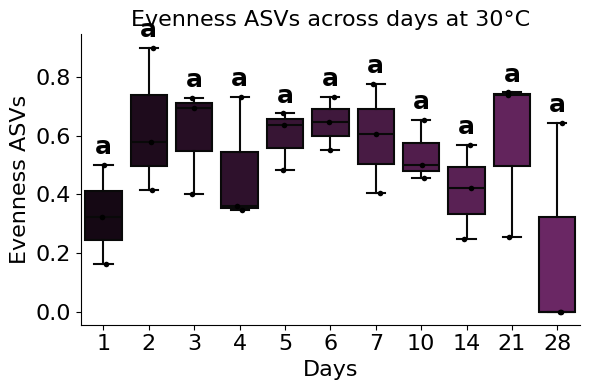

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


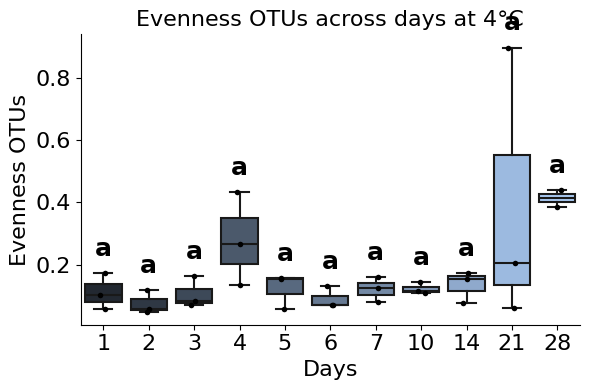

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


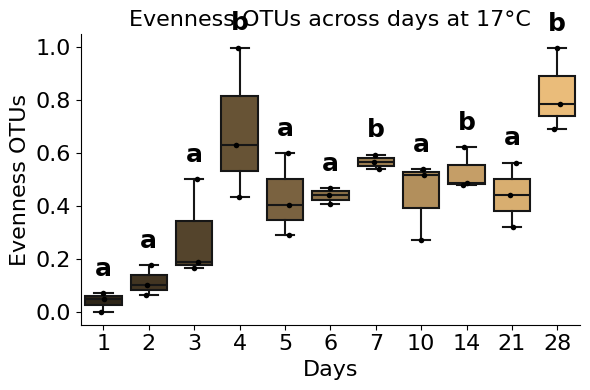

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


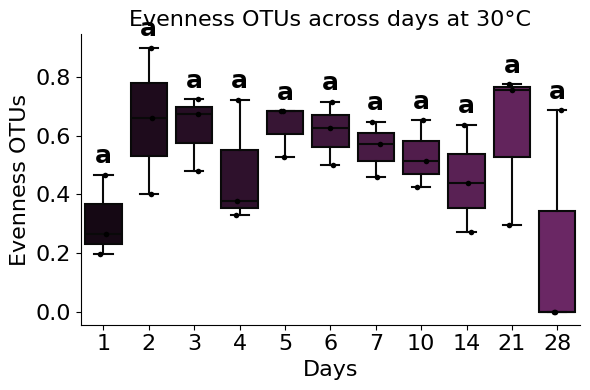

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


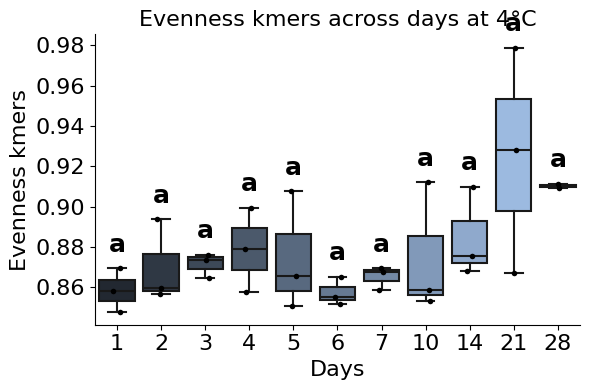

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


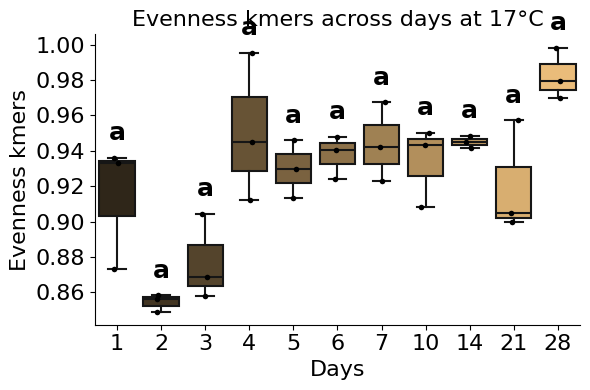

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


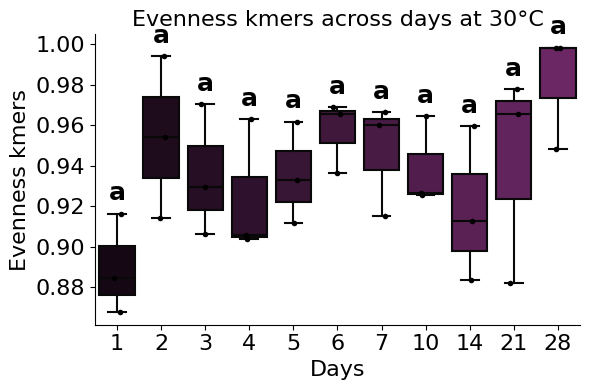

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


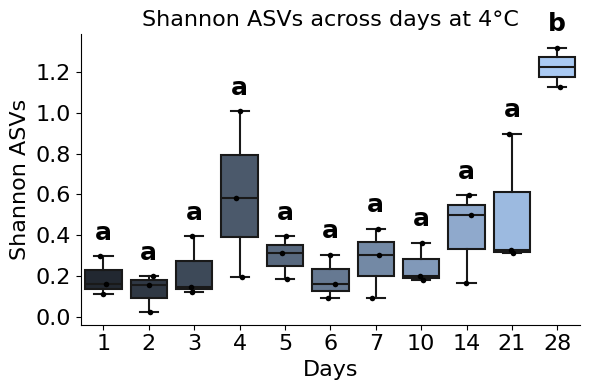

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


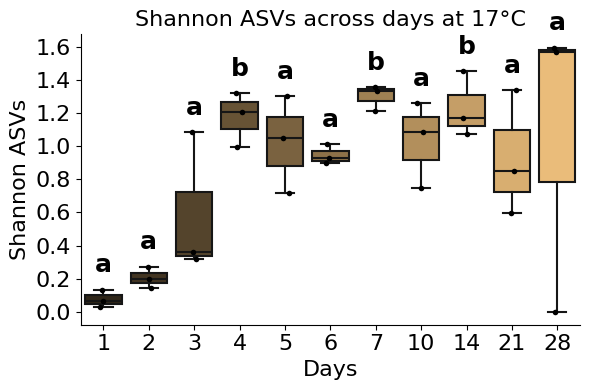

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


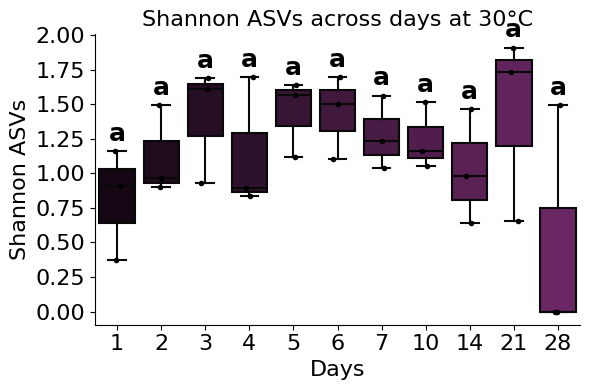

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


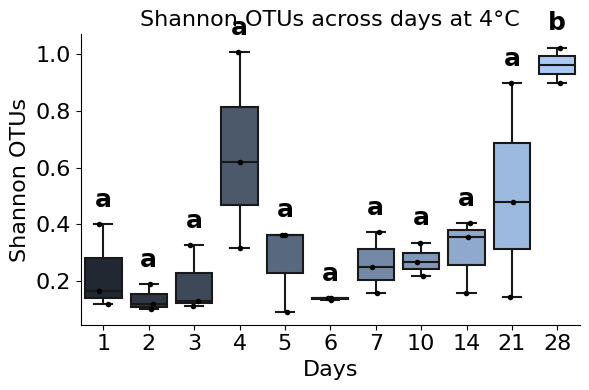

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


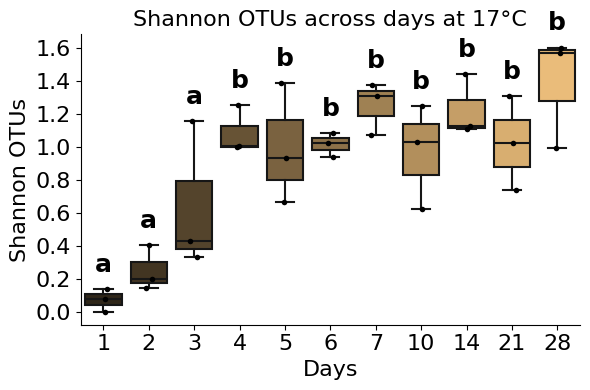

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


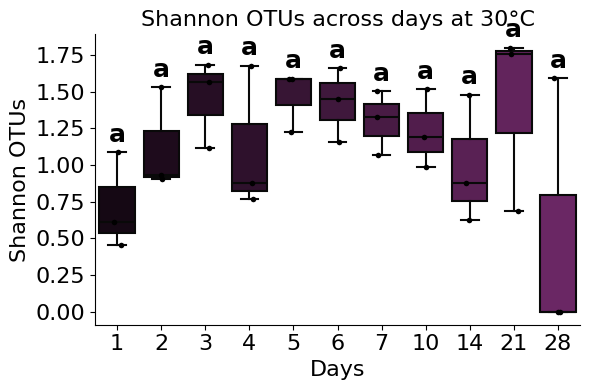

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


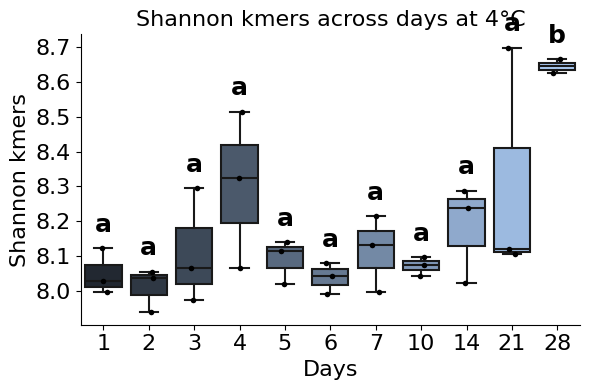

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


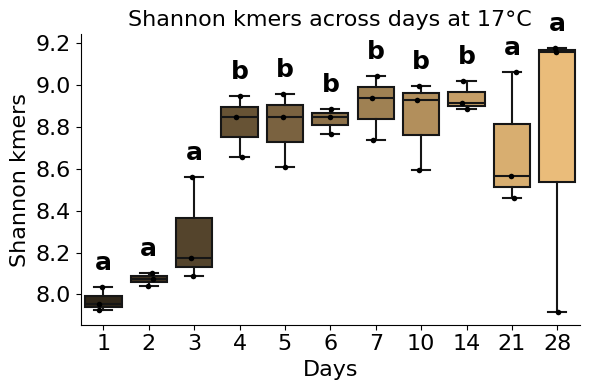

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


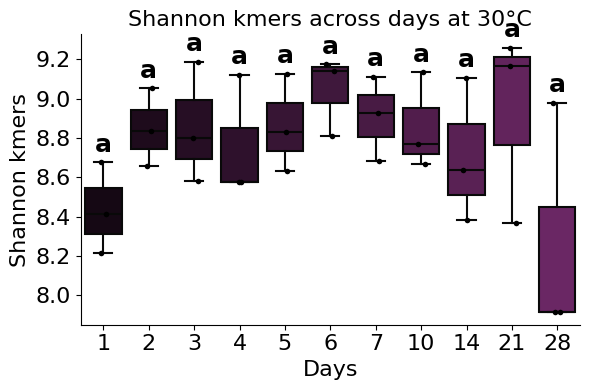

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


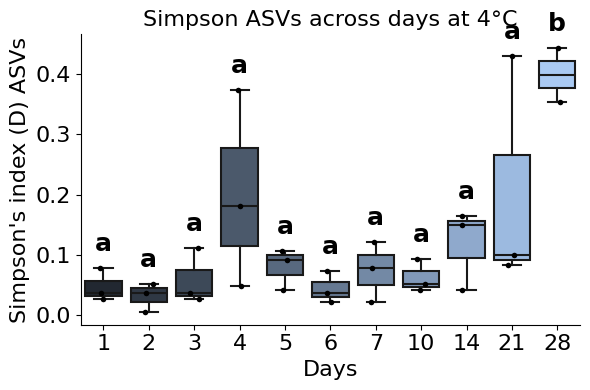

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


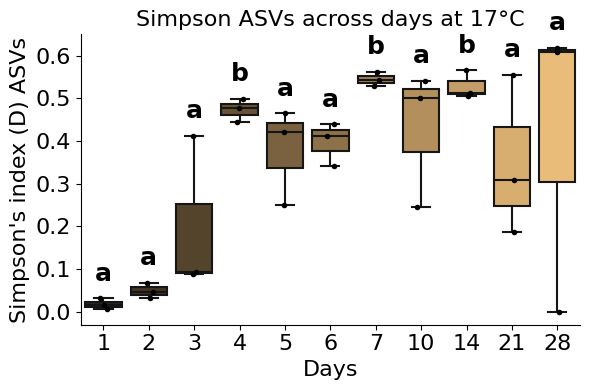

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


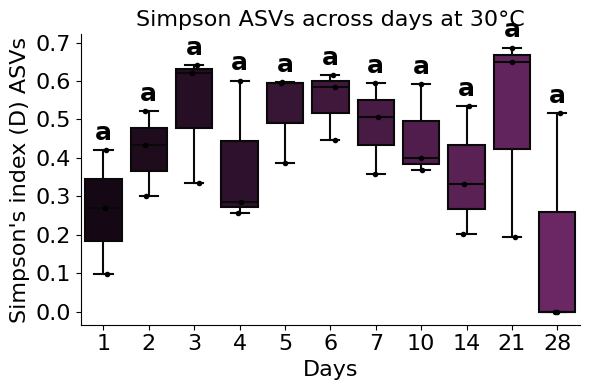

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


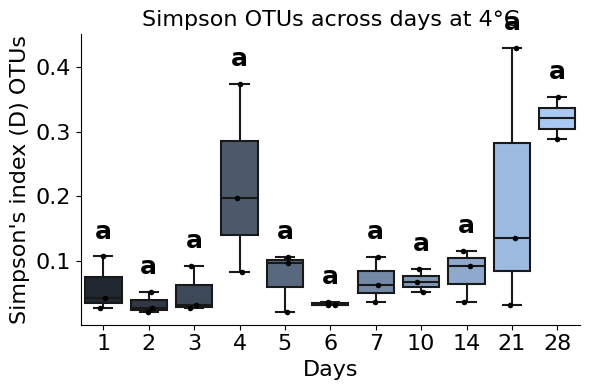

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


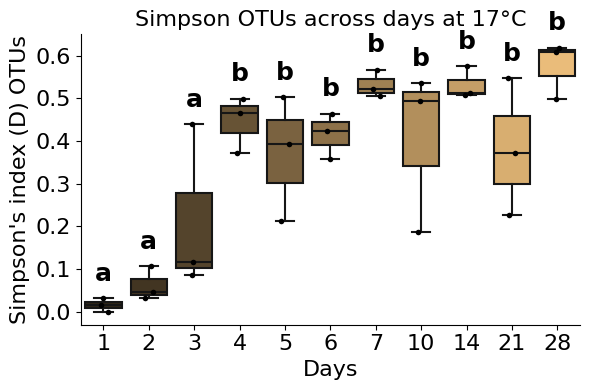

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


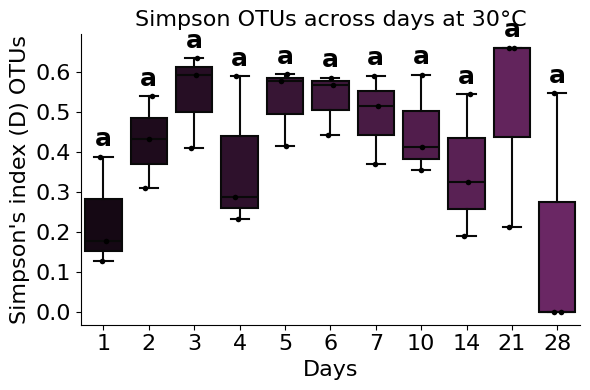

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


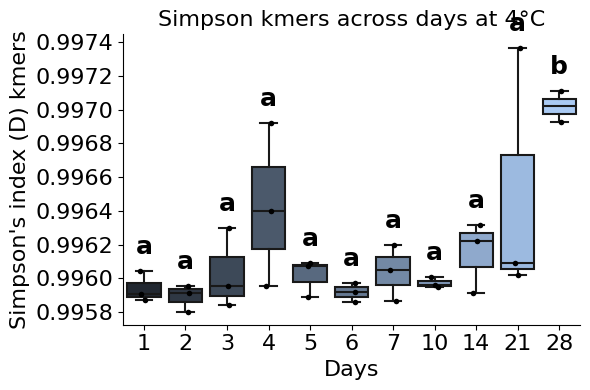

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


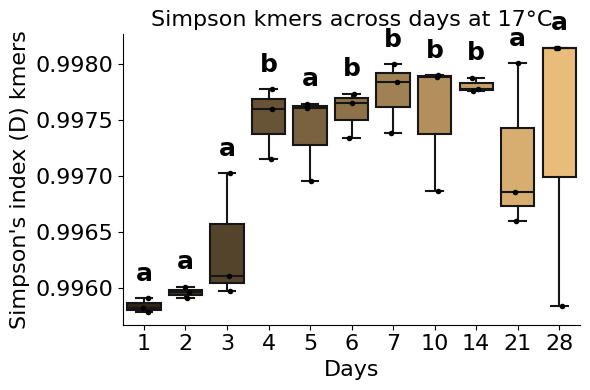

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


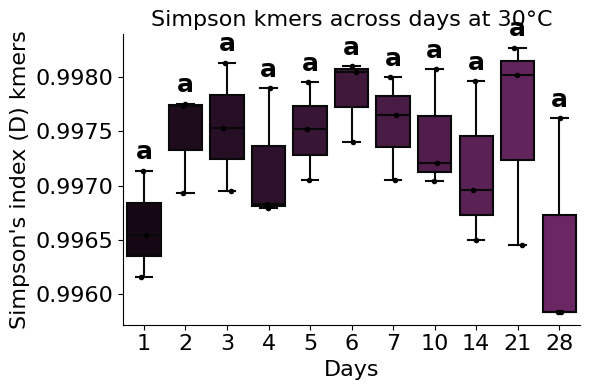

✅ Tukey HSD results exported to: Stats/20250513_tukey_results_all_variables_16S_all_temperatures.csv


In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Output directory
fig_dir = "Figures/per_variable_stats/"
os.makedirs(fig_dir, exist_ok=True)

# Metrics to analyze
metrics = {
    'pH': ('pH', 28),
    'TTA': ('TTA', 28),
    'LAB CFUs': ('log(CFUs)/g of sourdough', 28),
    'yeast CFUs': ('log(CFUs)/g of sourdough', 28),
    'estimate_bact': ('bacterial cells', 28),
    'DNA yield': ('DNA yield (ng/μL)', 28),
    'acetic acid': ('Concentration (mM)', 21),
    'glucose': ('Concentration (g/L)', 21),
    'fructose': ('Concentration (g/L)', 21),
    'sucrose': ('Concentration (g/L)', 21),
    'maltose': ('Concentration (g/L)', 21),
    'mannitol': ('Concentration (g/L)', 21),
    'succinic acid': ('Concentration (mM)', 21),
    'lactic acid': ('Concentration (mM)', 21),
    'ethanol': ('Concentration (mM)', 21),
    'Chao1 kmers': ('Chao1 kmers', 28),
    'Chao1 OTUs': ('Chao1 OTUs', 28),
    'Chao1 ASVs': ('Chao1 ASVs', 28),
    'Observed features ASVs': ('Observed features ASVs', 28),
    'Observed features OTUs': ('Observed features OTUs', 28),
    'Observed features kmers': ('Observed features kmers', 28),
    'Evenness ASVs': ('Evenness ASVs', 28),
    'Evenness OTUs': ('Evenness OTUs', 28),
    'Evenness kmers': ('Evenness kmers', 28),
    'Shannon ASVs': ('Shannon ASVs', 28),
    'Shannon OTUs': ('Shannon OTUs', 28),
    'Shannon kmers': ('Shannon kmers', 28),
    'Simpson ASVs': ("Simpson's index (D) ASVs", 28),
    'Simpson OTUs': ("Simpson's index (D) OTUs", 28),
    'Simpson kmers': ("Simpson's index (D) kmers", 28)
}

# Initialize list to collect all Tukey HSD results
all_tukey_stats = []

# Loop through each variable
for var, (ylab, max_day) in metrics.items():
    for temp in [4, 17, 30]:
        title = f"{var} across days at {temp}°C"
        filename = os.path.join(fig_dir, f"20250513_Tukey_{var.replace(' ', '_')}_{temp}C.pdf")

        # Plot and get stats
        fig, tukey_stats = plot_days_with_significance_letters(
            data=md,
            value_col=var,
            temperature_value=temp,
            title=title,
            ylabel=ylab,
            colors=md['color'],
            figsize=(6, 4),
            return_stats=True
        )

        # Save figure
        fig.savefig(filename, format='pdf', bbox_inches='tight')
        display(fig)
        plt.close(fig)

        # Add metadata
        tukey_stats['temperature'] = temp
        tukey_stats['variable'] = var
        all_tukey_stats.append(tukey_stats)

# Combine all results
tukey_combined_df = pd.concat(all_tukey_stats, ignore_index=True)

# Export to CSV
csv_path = "Stats/20250513_tukey_results_all_variables_16S_all_temperatures.csv"
tukey_combined_df.to_csv(csv_path, index=False)
print(f"✅ Tukey HSD results exported to: {csv_path}")